In [134]:

import os
import numpy as np
import pandas as pd
import glob

In [135]:
# import glob
# import pandas as pd

# get the list of text files in the current directory
txt_files = glob.glob("*.txt")

# create an empty list to store the dataframes
dfs = []

# define the column names you want to use
column_names = ["batv", "engnst",'engntemp','genal1','genal2','genal3','genvl1','genvl2','genvl3','gkva','gkval1','gkval2','gkval3','kwh','mainsf','mainvl1','mainvl2','mainvl3','numstrt','oilpres','rpm','runhour','t2maint']

# loop through each text file
for i, txt_file in enumerate(txt_files):
    # read the text file as a csv dataframe with underscore separator
    df = pd.read_csv(txt_file, sep="_")
    # rename the column with the corresponding name
    df = df.rename(columns={df.columns[0]: column_names[i]})
    # split the column by the | symbol and expand the result into two columns
    df[[column_names[i] + '_left', column_names[i] + '_right']] = df[column_names[i]].str.split('|', expand=True)
    # drop the original column
    df = df.drop(column_names[i], axis=1)
    # append the dataframe to the list
    dfs.append(df)

# concatenate the dataframes horizontally
real = pd.concat(dfs, axis=1)

# write the result to a csv file
real.to_csv("real.csv")

In [136]:
real

batv_left batv_right      engnst_left engnst_right  \
0        1675066942538         274   1675066942538             0   
1        1675067002519         274   1675067002519             0   
2        1675067122792         274   1675067122792             0   
3        1675067184974         274   1675067184974             0   
4        1675067244134         274   1675067244134             0   
...                 ...        ...              ...          ...   
169597   1692192571705         275   1692192571705             0   
169598   1692192711657         275   1692192711657             0   
169599   1692192751686         275   1692192751686             0   
169600              NaN        NaN   1692192811716             0   
169601              NaN        NaN              NaN          NaN   

          engntemp_left engntemp_right      genal1_left genal1_right  \
0        1675066942538              35   1675067062806             0   
1        1675067002519              35   1675067002519             0   
2        1675067122792              35   1675067122792             0   
3        1675067184974              35   1675067184974             0   
4        1675067244134              35   1675067244134             0   
...                 ...            ...              ...          ...   
169597   1692192571705              53   1692192571705             0   
169598   1692192711657              53   1692192711657             0   
169599   1692192751686              52   1692192751686             0   
169600              NaN            NaN              NaN          NaN   
169601              NaN            NaN              NaN          NaN   

            genal2_left genal2_right  ...     numstrt_left numstrt_right  \
0        1675067062806             0  ...   1675066942538             50   
1        1675067002519             0  ...   1675067002519             50   
2        1675067122792             0  ...   1675067122792             50   
3        1675067184974             0  ...   1675067184974             50   
4        1675067244134             0  ...   1675067244134             50   
...                 ...          ...  ...              ...           ...   
169597   1692192571705             0  ...   1692192571705            259   
169598   1692192711657             0  ...   1692192711657            259   
169599   1692192751686             0  ...   1692192751686            259   
169600              NaN          NaN  ...   1692192811716            259   
169601              NaN          NaN  ...              NaN           NaN   

           oilpres_left oilpres_right         rpm_left rpm_right  \
0        1675066942538              0   1675067062806          0   
1        1675067002519              0   1675067002519          0   
2        1675067122792              0   1675067122792          0   
3        1675067184974              0   1675067184974          0   
4        1675067244134              0   1675067244134          0   
...                 ...           ...              ...       ...   
169597   1692192571705              0   1692192571705          0   
169598   1692192711657              0   1692192711657          0   
169599   1692192751686              0   1692192751686          0   
169600              NaN           NaN              NaN       NaN   
169601              NaN           NaN              NaN       NaN   

           runhour_left runhour_right     t2maint_left t2maint_right  
0        1675066942538              5   1675066942538              0  
1        1675067002519              5   1675067002519              0  
2        1675067122792              5   1675067122792              0  
3        1675067184974              5   1675067184974              0  
4        1675067244134              5   1675067244134              0  
...                 ...           ...              ...           ...  
169597   1692192571705            215   1692192571705            250  
169598   1692192711657            

In [137]:
real.rename(columns = {'batv_left':'Timestamp'}, inplace = True)

In [138]:
real

Timestamp batv_right      engnst_left engnst_right  \
0        1675066942538         274   1675066942538             0   
1        1675067002519         274   1675067002519             0   
2        1675067122792         274   1675067122792             0   
3        1675067184974         274   1675067184974             0   
4        1675067244134         274   1675067244134             0   
...                 ...        ...              ...          ...   
169597   1692192571705         275   1692192571705             0   
169598   1692192711657         275   1692192711657             0   
169599   1692192751686         275   1692192751686             0   
169600              NaN        NaN   1692192811716             0   
169601              NaN        NaN              NaN          NaN   

          engntemp_left engntemp_right      genal1_left genal1_right  \
0        1675066942538              35   1675067062806             0   
1        1675067002519              35   1675067002519             0   
2        1675067122792              35   1675067122792             0   
3        1675067184974              35   1675067184974             0   
4        1675067244134              35   1675067244134             0   
...                 ...            ...              ...          ...   
169597   1692192571705              53   1692192571705             0   
169598   1692192711657              53   1692192711657             0   
169599   1692192751686              52   1692192751686             0   
169600              NaN            NaN              NaN          NaN   
169601              NaN            NaN              NaN          NaN   

            genal2_left genal2_right  ...     numstrt_left numstrt_right  \
0        1675067062806             0  ...   1675066942538             50   
1        1675067002519             0  ...   1675067002519             50   
2        1675067122792             0  ...   1675067122792             50   
3        1675067184974             0  ...   1675067184974             50   
4        1675067244134             0  ...   1675067244134             50   
...                 ...          ...  ...              ...           ...   
169597   1692192571705             0  ...   1692192571705            259   
169598   1692192711657             0  ...   1692192711657            259   
169599   1692192751686             0  ...   1692192751686            259   
169600              NaN          NaN  ...   1692192811716            259   
169601              NaN          NaN  ...              NaN           NaN   

           oilpres_left oilpres_right         rpm_left rpm_right  \
0        1675066942538              0   1675067062806          0   
1        1675067002519              0   1675067002519          0   
2        1675067122792              0   1675067122792          0   
3        1675067184974              0   1675067184974          0   
4        1675067244134              0   1675067244134          0   
...                 ...           ...              ...       ...   
169597   1692192571705              0   1692192571705          0   
169598   1692192711657              0   1692192711657          0   
169599   1692192751686              0   1692192751686          0   
169600              NaN           NaN              NaN       NaN   
169601              NaN           NaN              NaN       NaN   

           runhour_left runhour_right     t2maint_left t2maint_right  
0        1675066942538              5   1675066942538              0  
1        1675067002519              5   1675067002519              0  
2        1675067122792              5   1675067122792              0  
3        1675067184974              5   1675067184974              0  
4        1675067244134              5   1675067244134              0  
...                 ...           ...              ...           ...  
169597   1692192571705            215   1692192571705            250  
169598   1692192711657            

In [139]:
real = real.drop(real.columns[[2, 4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44]], axis=1)

In [140]:
real

Timestamp batv_right engnst_right engntemp_right genal1_right  \
0        1675066942538         274            0             35            0   
1        1675067002519         274            0             35            0   
2        1675067122792         274            0             35            0   
3        1675067184974         274            0             35            0   
4        1675067244134         274            0             35            0   
...                 ...        ...          ...            ...          ...   
169597   1692192571705         275            0             53            0   
169598   1692192711657         275            0             53            0   
169599   1692192751686         275            0             52            0   
169600              NaN        NaN            0            NaN          NaN   
169601              NaN        NaN          NaN            NaN          NaN   

       genal2_right genal3_right genvl1_right genvl2_right genvl3_right  ...  \
0                 0            0            0            0            0  ...   
1                 0            0            0            0            0  ...   
2                 0            0            0            0            0  ...   
3                 0            0            0            0            0  ...   
4                 0            0            0            0            0  ...   
...             ...          ...          ...          ...          ...  ...   
169597            0            0            0            0            0  ...   
169598            0            0            0            0            0  ...   
169599            0            0          NaN            0            0  ...   
169600          NaN          NaN          NaN          NaN          NaN  ...   
169601          NaN          NaN          NaN          NaN          NaN  ...   

         kwh_right mainsf_right mainvl1_right mainvl2_right mainvl3_right  \
0              141          499           229           227           227   
1              141          500           229           228           227   
2              141          500           229           227           227   
3              141          499           229           227           227   
4              141          500           229           227           227   
...            ...          ...           ...           ...           ...   
169597        6618          502           234           232           233   
169598        6618          499           234           233           233   
169599        6618          499           235           233           233   
169600        6618          NaN           NaN           NaN           NaN   
169601         NaN          NaN           NaN           NaN           NaN   

       numstrt_right oilpres_right rpm_right runhour_right t2maint_right  
0                 50             0         0             5             0  
1                 50             0         0             5             0  
2                 50             0         0             5             0  
3                 50             0         0             5             0  
4                 50             0         0             5             0  
...              ...           ...       ...           ...           ...  
169597           259             0         0           215           250  
169598           259             0         0           215           250  
169599           259             0         0           215           250  
169600           259           NaN       NaN           215           250  
169601           NaN           NaN       NaN           NaN           250  

[169602 rows x 24 columns]

In [141]:
real.set_index('Timestamp', inplace=True)

In [142]:
real

batv_right engnst_right engntemp_right genal1_right  \
Timestamp                                                             
 1675066942538         274            0             35            0   
 1675067002519         274            0             35            0   
 1675067122792         274            0             35            0   
 1675067184974         274            0             35            0   
 1675067244134         274            0             35            0   
...                    ...          ...            ...          ...   
 1692192571705         275            0             53            0   
 1692192711657         275            0             53            0   
 1692192751686         275            0             52            0   
NaN                    NaN            0            NaN          NaN   
NaN                    NaN          NaN            NaN          NaN   

                genal2_right genal3_right genvl1_right genvl2_right  \
Timestamp                                                             
 1675066942538             0            0            0            0   
 1675067002519             0            0            0            0   
 1675067122792             0            0            0            0   
 1675067184974             0            0            0            0   
 1675067244134             0            0            0            0   
...                      ...          ...          ...          ...   
 1692192571705             0            0            0            0   
 1692192711657             0            0            0            0   
 1692192751686             0            0          NaN            0   
NaN                      NaN          NaN          NaN          NaN   
NaN                      NaN          NaN          NaN          NaN   

                genvl3_right gkva_right  ...   kwh_right mainsf_right  \
Timestamp                                ...                            
 1675066942538             0          0  ...         141          499   
 1675067002519             0          0  ...         141          500   
 1675067122792             0          0  ...         141          500   
 1675067184974             0          0  ...         141          499   
 1675067244134             0          0  ...         141          500   
...                      ...        ...  ...         ...          ...   
 1692192571705             0          0  ...        6618          502   
 1692192711657             0          0  ...        6618          499   
 1692192751686             0          0  ...        6618          499   
NaN                      NaN        NaN  ...        6618          NaN   
NaN                      NaN        NaN  ...         NaN          NaN   

                mainvl1_right mainvl2_right mainvl3_right numstrt_right  \
Timestamp                                                                 
 1675066942538            229           227           227            50   
 1675067002519            229           228           227            50   
 1675067122792            229           227           227            50   
 1675067184974            229           227           227            50   
 1675067244134            229           227           227            50   
...                       ...           ...           ...           ...   
 1692192571705            234           232           233           259   
 1692192711657            234           233           233           259   
 1692192751686            235           233           233           259   
NaN                       NaN           NaN           NaN           259   
NaN                       NaN           NaN           NaN           NaN   

                oilpres_right rpm_right runhour_right t2maint_right  
Timestamp                                                            
 1675066942538              0         0             5             0  
 1675067002519              0   

In [143]:
duplicated_index = real.index.duplicated()

# print the boolean array
print(f"The boolean array indicating whether each index value is duplicated or not:\n**{duplicated_index}**")

The boolean array indicating whether each index value is duplicated or not:
**[False False False ... False False  True]**


In [144]:
duplicated_index

array([False, False, False, ..., False, False,  True])

In [149]:
real

batv_right engnst_right engntemp_right genal1_right  \
Timestamp                                                             
 1675066942538         274            0             35            0   
 1675067002519         274            0             35            0   
 1675067122792         274            0             35            0   
 1675067184974         274            0             35            0   
 1675067244134         274            0             35            0   
...                    ...          ...            ...          ...   
 1692192571705         275            0             53            0   
 1692192711657         275            0             53            0   
 1692192751686         275            0             52            0   
NaN                    NaN            0            NaN          NaN   
NaN                    NaN          NaN            NaN          NaN   

                genal2_right genal3_right genvl1_right genvl2_right  \
Timestamp                                                             
 1675066942538             0            0            0            0   
 1675067002519             0            0            0            0   
 1675067122792             0            0            0            0   
 1675067184974             0            0            0            0   
 1675067244134             0            0            0            0   
...                      ...          ...          ...          ...   
 1692192571705             0            0            0            0   
 1692192711657             0            0            0            0   
 1692192751686             0            0          NaN            0   
NaN                      NaN          NaN          NaN          NaN   
NaN                      NaN          NaN          NaN          NaN   

                genvl3_right gkva_right  ...   kwh_right mainsf_right  \
Timestamp                                ...                            
 1675066942538             0          0  ...         141          499   
 1675067002519             0          0  ...         141          500   
 1675067122792             0          0  ...         141          500   
 1675067184974             0          0  ...         141          499   
 1675067244134             0          0  ...         141          500   
...                      ...        ...  ...         ...          ...   
 1692192571705             0          0  ...        6618          502   
 1692192711657             0          0  ...        6618          499   
 1692192751686             0          0  ...        6618          499   
NaN                      NaN        NaN  ...        6618          NaN   
NaN                      NaN        NaN  ...         NaN          NaN   

                mainvl1_right mainvl2_right mainvl3_right numstrt_right  \
Timestamp                                                                 
 1675066942538            229           227           227            50   
 1675067002519            229           228           227            50   
 1675067122792            229           227           227            50   
 1675067184974            229           227           227            50   
 1675067244134            229           227           227            50   
...                       ...           ...           ...           ...   
 1692192571705            234           232           233           259   
 1692192711657            234           233           233           259   
 1692192751686            235           233           233           259   
NaN                       NaN           NaN           NaN           259   
NaN                       NaN           NaN           NaN           NaN   

                oilpres_right rpm_right runhour_right t2maint_right  
Timestamp                                                            
 1675066942538              0         0             5             0  
 1675067002519              0   

In [150]:
list(real.columns.values.tolist())

['batv_right',
 'engnst_right',
 'engntemp_right',
 'genal1_right',
 'genal2_right',
 'genal3_right',
 'genvl1_right',
 'genvl2_right',
 'genvl3_right',
 'gkva_right',
 'gkval1_right',
 'gkval2_right',
 'gkval3_right',
 'kwh_right',
 'mainsf_right',
 'mainvl1_right',
 'mainvl2_right',
 'mainvl3_right',
 'numstrt_right',
 'oilpres_right',
 'rpm_right',
 'runhour_right',
 't2maint_right']

In [151]:
real.shape

(169602, 23)

In [152]:
print(real['gkval1_right'].value_counts())

gkval1_right
      0    159932
     11      1203
     12       976
    146       960
     13       891
     10       862
      9       736
     14       719
     15       641
      8       527
     16       342
     17       303
      3       264
      7       239
     18       219
    147       200
      2       182
     19       129
      4       114
      6        74
     20        36
      5        30
     21         9
     22         8
     23         3
     24         1
Name: count, dtype: int64


In [153]:
real = real.sort_values(by=["Timestamp"], ascending=True)

In [154]:
real

batv_right engnst_right engntemp_right genal1_right  \
Timestamp                                                             
 1675066942538         274            0             35            0   
 1675067002519         274            0             35            0   
 1675067122792         274            0             35            0   
 1675067184974         274            0             35            0   
 1675067244134         274            0             35            0   
...                    ...          ...            ...          ...   
 1692192571705         275            0             53            0   
 1692192711657         275            0             53            0   
 1692192751686         275            0             52            0   
NaN                    NaN            0            NaN          NaN   
NaN                    NaN          NaN            NaN          NaN   

                genal2_right genal3_right genvl1_right genvl2_right  \
Timestamp                                                             
 1675066942538             0            0            0            0   
 1675067002519             0            0            0            0   
 1675067122792             0            0            0            0   
 1675067184974             0            0            0            0   
 1675067244134             0            0            0            0   
...                      ...          ...          ...          ...   
 1692192571705             0            0            0            0   
 1692192711657             0            0            0            0   
 1692192751686             0            0          NaN            0   
NaN                      NaN          NaN          NaN          NaN   
NaN                      NaN          NaN          NaN          NaN   

                genvl3_right gkva_right  ...   kwh_right mainsf_right  \
Timestamp                                ...                            
 1675066942538             0          0  ...         141          499   
 1675067002519             0          0  ...         141          500   
 1675067122792             0          0  ...         141          500   
 1675067184974             0          0  ...         141          499   
 1675067244134             0          0  ...         141          500   
...                      ...        ...  ...         ...          ...   
 1692192571705             0          0  ...        6618          502   
 1692192711657             0          0  ...        6618          499   
 1692192751686             0          0  ...        6618          499   
NaN                      NaN        NaN  ...        6618          NaN   
NaN                      NaN        NaN  ...         NaN          NaN   

                mainvl1_right mainvl2_right mainvl3_right numstrt_right  \
Timestamp                                                                 
 1675066942538            229           227           227            50   
 1675067002519            229           228           227            50   
 1675067122792            229           227           227            50   
 1675067184974            229           227           227            50   
 1675067244134            229           227           227            50   
...                       ...           ...           ...           ...   
 1692192571705            234           232           233           259   
 1692192711657            234           233           233           259   
 1692192751686            235           233           233           259   
NaN                       NaN           NaN           NaN           259   
NaN                       NaN           NaN           NaN           NaN   

                oilpres_right rpm_right runhour_right t2maint_right  
Timestamp                                                            
 1675066942538              0         0             5             0  
 1675067002519              0   

In [155]:
real = real.astype(float)
real.dtypes

batv_right        float64
engnst_right      float64
engntemp_right    float64
genal1_right      float64
genal2_right      float64
genal3_right      float64
genvl1_right      float64
genvl2_right      float64
genvl3_right      float64
gkva_right        float64
gkval1_right      float64
gkval2_right      float64
gkval3_right      float64
kwh_right         float64
mainsf_right      float64
mainvl1_right     float64
mainvl2_right     float64
mainvl3_right     float64
numstrt_right     float64
oilpres_right     float64
rpm_right         float64
runhour_right     float64
t2maint_right     float64
dtype: object

In [156]:
max_value = real['batv_right'].max()

# print the result
print(max_value)

291.0


In [157]:
real.isnull().sum()

batv_right        2
engnst_right      1
engntemp_right    2
genal1_right      2
genal2_right      2
genal3_right      2
genvl1_right      3
genvl2_right      2
genvl3_right      2
gkva_right        2
gkval1_right      2
gkval2_right      2
gkval3_right      2
kwh_right         1
mainsf_right      2
mainvl1_right     2
mainvl2_right     2
mainvl3_right     2
numstrt_right     1
oilpres_right     2
rpm_right         2
runhour_right     1
t2maint_right     0
dtype: int64

In [158]:
real.shape

(169602, 23)

In [159]:
import missingno as msno

<Axes: >

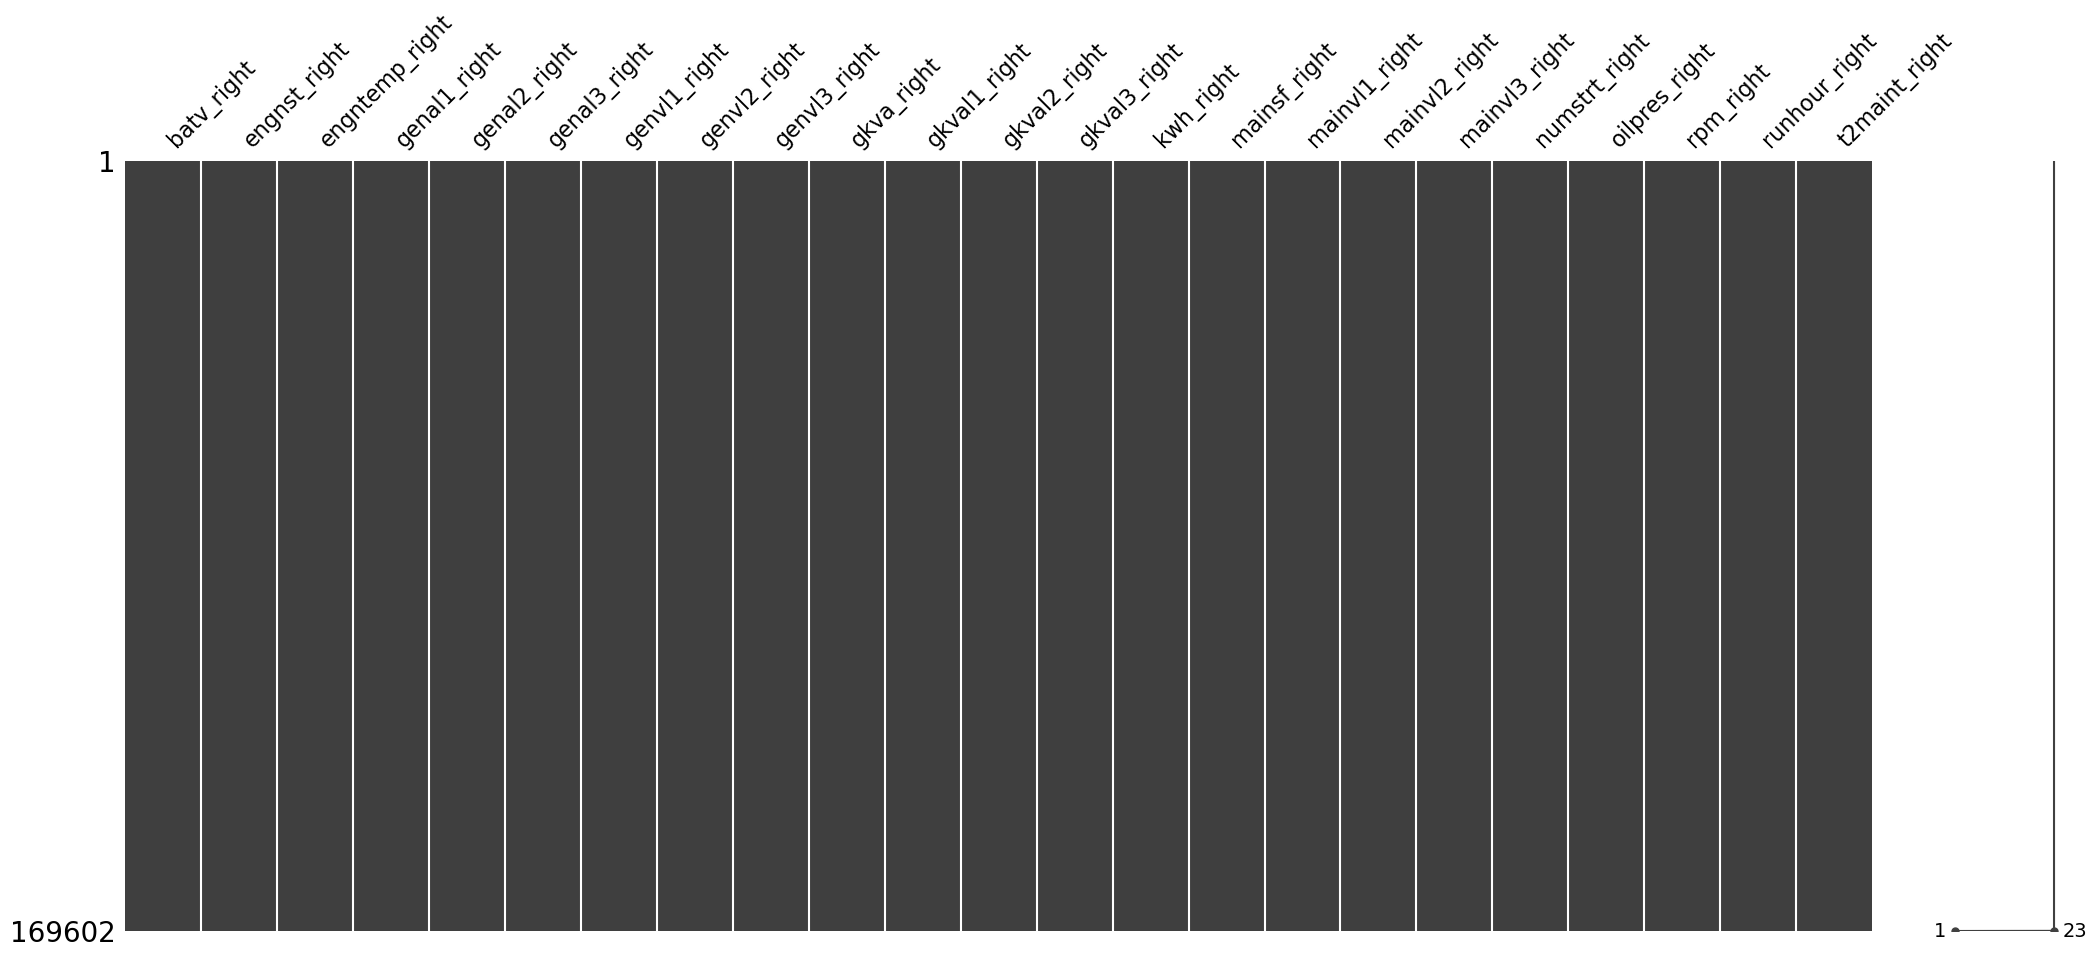

In [160]:
msno.matrix(real)

In [161]:
real.count()

batv_right        169600
engnst_right      169601
engntemp_right    169600
genal1_right      169600
genal2_right      169600
genal3_right      169600
genvl1_right      169599
genvl2_right      169600
genvl3_right      169600
gkva_right        169600
gkval1_right      169600
gkval2_right      169600
gkval3_right      169600
kwh_right         169601
mainsf_right      169600
mainvl1_right     169600
mainvl2_right     169600
mainvl3_right     169600
numstrt_right     169601
oilpres_right     169600
rpm_right         169600
runhour_right     169601
t2maint_right     169602
dtype: int64

In [162]:
real.shape

(169602, 23)

In [163]:
real.dropna(inplace=True)


In [164]:
real.describe()

batv_right   engnst_right  engntemp_right   genal1_right  \
count  169599.000000  169599.000000   169599.000000  169599.000000   
mean      273.436966       0.452220       38.336393       2.632905   
std        24.016160       1.965658        9.357364      12.022920   
min         0.000000       0.000000       11.000000       0.000000   
25%       275.000000       0.000000       35.000000       0.000000   
50%       275.000000       0.000000       35.000000       0.000000   
75%       275.000000       0.000000       35.000000       0.000000   
max       291.000000      13.000000       94.000000     109.000000   

        genal2_right   genal3_right   genvl1_right   genvl2_right  \
count  169599.000000  169599.000000  169599.000000  169599.000000   
mean        1.744828       3.035100      11.485716      11.760305   
std         8.035276      14.545704      49.956729      51.118771   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        74.000000     133.000000     232.000000     239.000000   

        genvl3_right     gkva_right  ...     kwh_right   mainsf_right  \
count  169599.000000  169599.000000  ...  1.695990e+05  169599.000000   
mean       11.699450       1.984180  ...  1.235932e+06     474.156687   
std        50.866551       8.503498  ...  1.359572e+07     110.652730   
min         0.000000       0.000000  ...  1.410000e+02       0.000000   
25%         0.000000       0.000000  ...  1.155000e+03     500.000000   
50%         0.000000       0.000000  ...  2.901000e+03     501.000000   
75%         0.000000       0.000000  ...  3.756000e+03     501.000000   
max       241.000000      69.000000  ...  1.516175e+08     509.000000   

       mainvl1_right  mainvl2_right  mainvl3_right  numstrt_right  \
count  169599.000000  169599.000000  169599.000000  169599.000000   
mean      221.572397     220.180968     219.906468     689.301818   
std        51.662818      51.334340      51.273509    5882.224081   
min         0.000000       0.000000       0.000000      50.000000   
25%       230.000000     229.000000     229.000000      97.000000   
50%       233.000000     232.000000     232.000000     169.000000   
75%       236.000000     235.000000     234.000000     203.000000   
max       242.000000     241.000000     241.000000   65535.000000   

       oilpres_right      rpm_right  runhour_right  t2maint_right  
count  169599.000000  169599.000000  169599.000000  169599.000000  
mean       22.888095      75.808601      98.864834      53.739037  
std       100.825510     329.726469      56.463398     102.387289  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000      42.000000       0.000000  
50%         0.000000       0.000000     109.000000       0.000000  
75%         0.000000       0.000000     140.000000       0.000000  
max       708.000000    1517.000000     215.000000     250.000000  

[8 rows x 23 columns]

In [234]:
duplicated_index = real.index.duplicated()

# print the boolean array
print(f"The boolean array indicating whether each index value is duplicated or not:\n**{duplicated_index}**")

The boolean array indicating whether each index value is duplicated or not:
**[False False False ... False False False]**


In [235]:
duplicated_index

array([False, False, False, ..., False, False, False])

In [165]:
column = ['batv_right']
for columns in real:
    unique_vals = np.unique(real[column])
    nr_values = len(unique_vals)
    if  nr_values < 10:
        print("the number values for feature {} :{} --{}".format(column,nr_values,unique_vals))
    else:
        print("the number values for feature {} :{} ".format(column,nr_values))
        

the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 
the number values for feature ['batv_right'] :30 


In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans as kmeans

In [167]:
real.columns

Index(['batv_right', 'engnst_right', 'engntemp_right', 'genal1_right',
       'genal2_right', 'genal3_right', 'genvl1_right', 'genvl2_right',
       'genvl3_right', 'gkva_right', 'gkval1_right', 'gkval2_right',
       'gkval3_right', 'kwh_right', 'mainsf_right', 'mainvl1_right',
       'mainvl2_right', 'mainvl3_right', 'numstrt_right', 'oilpres_right',
       'rpm_right', 'runhour_right', 't2maint_right'],
      dtype='object')

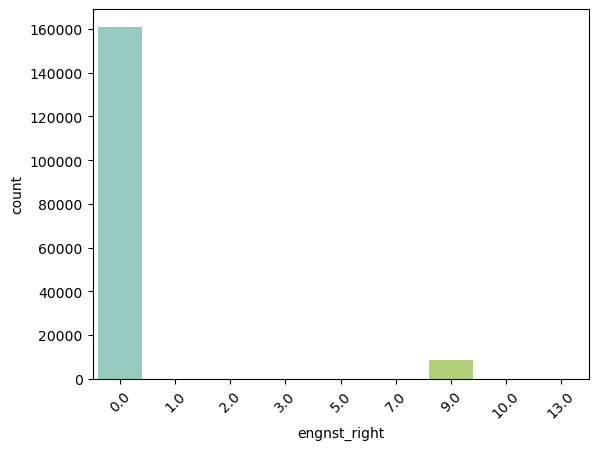

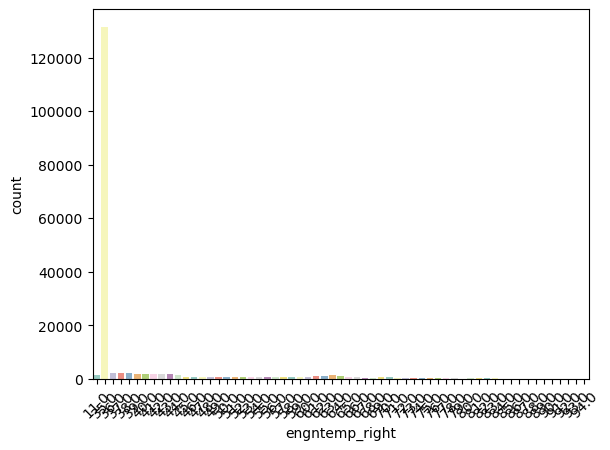

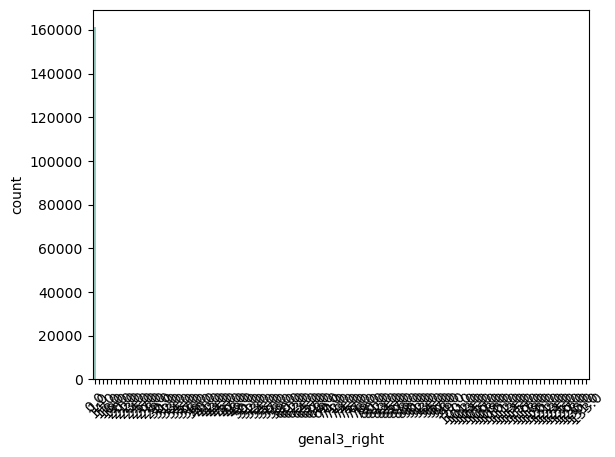

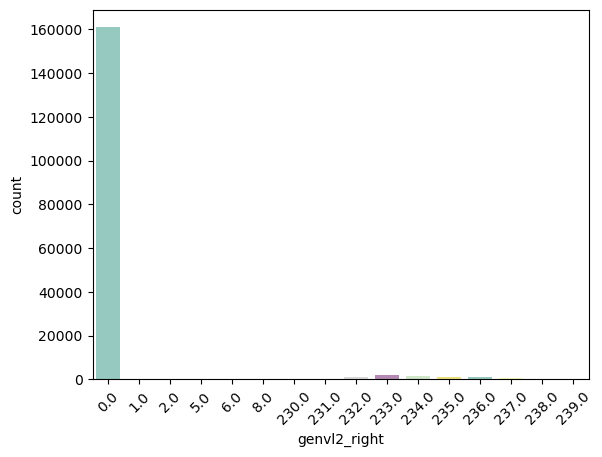

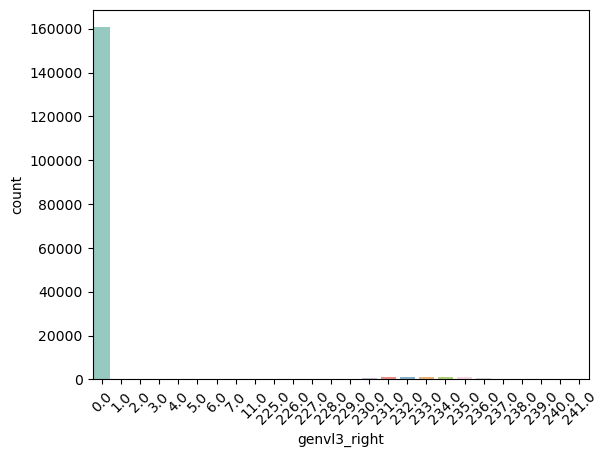

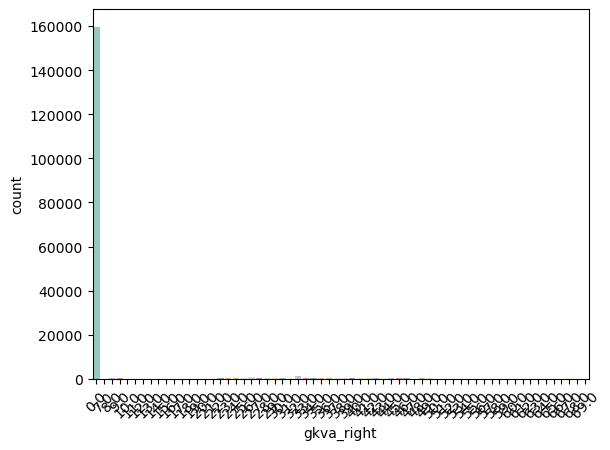

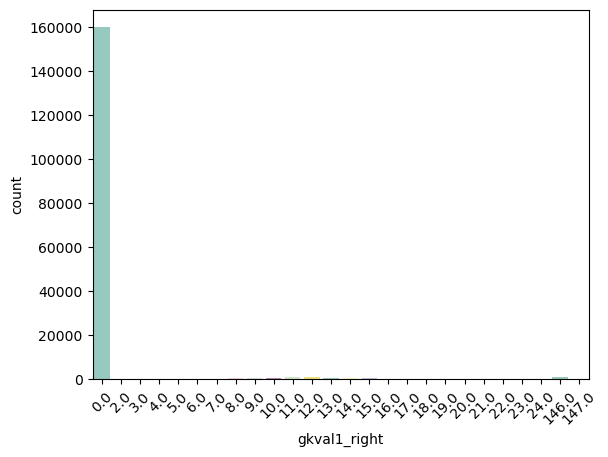

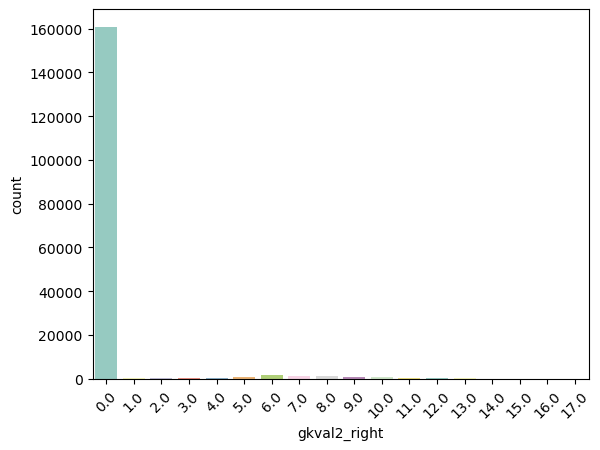

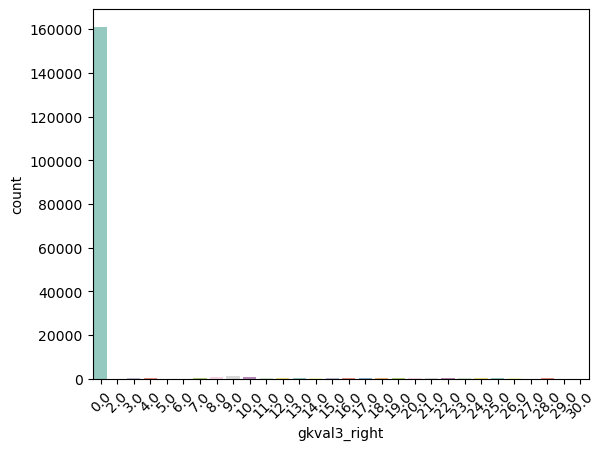

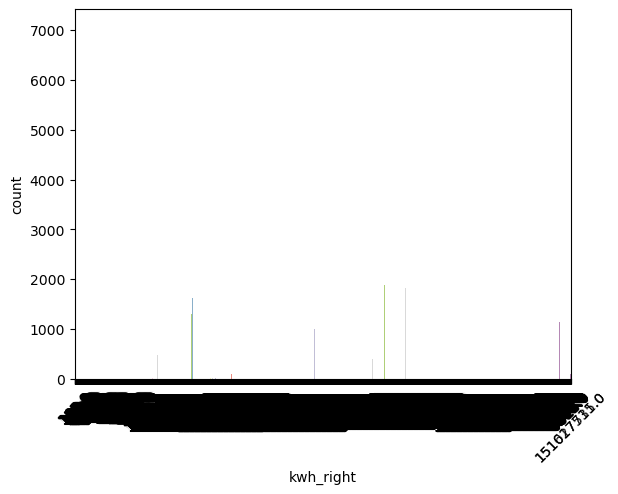

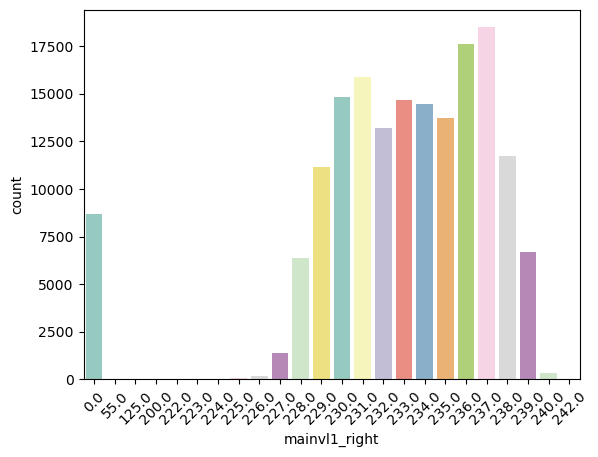

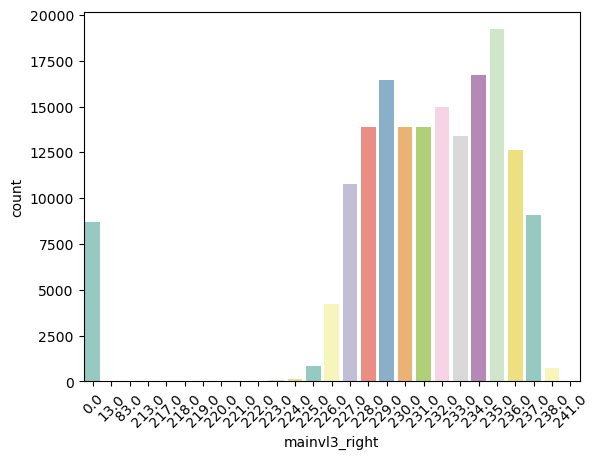

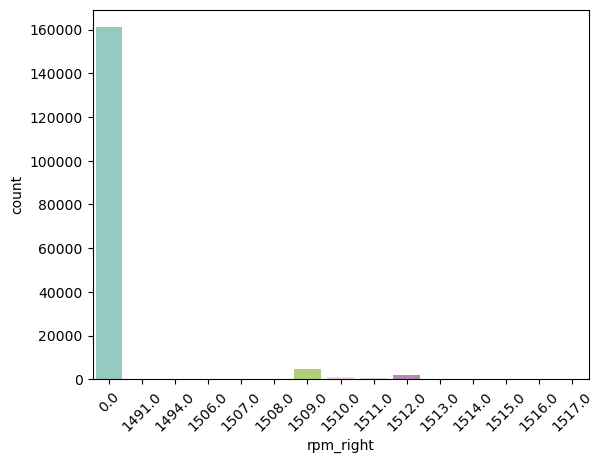

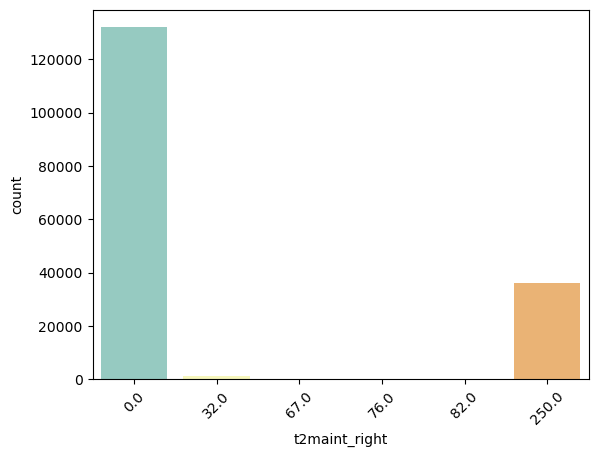

In [170]:
features = ['batv_right', 'engnst_right', 'engntemp_right', 'genal1_right', 'genal2_right', 'genal3_right', 'genvl1_right', 'genvl2_right', 'genvl3_right', 'gkva_right', 'gkval1_right', 'gkval2_right', 'gkval3_right', 'kwh_right', 'mainsf_right', 'mainvl1_right', 'mainvl2_right', 'mainvl3_right', 'numstrt_right', 'oilpres_right', 'rpm_right', 'runhour_right', 't2maint_right']

for f in features:
    sns.countplot(x=f, data=real, palette='Set3')
    plt.xticks(rotation=45)
    plt.show()

In [171]:
real.count()

batv_right        169599
engnst_right      169599
engntemp_right    169599
genal1_right      169599
genal2_right      169599
genal3_right      169599
genvl1_right      169599
genvl2_right      169599
genvl3_right      169599
gkva_right        169599
gkval1_right      169599
gkval2_right      169599
gkval3_right      169599
kwh_right         169599
mainsf_right      169599
mainvl1_right     169599
mainvl2_right     169599
mainvl3_right     169599
numstrt_right     169599
oilpres_right     169599
rpm_right         169599
runhour_right     169599
t2maint_right     169599
dtype: int64

In [172]:
real.isnull().sum()

batv_right        0
engnst_right      0
engntemp_right    0
genal1_right      0
genal2_right      0
genal3_right      0
genvl1_right      0
genvl2_right      0
genvl3_right      0
gkva_right        0
gkval1_right      0
gkval2_right      0
gkval3_right      0
kwh_right         0
mainsf_right      0
mainvl1_right     0
mainvl2_right     0
mainvl3_right     0
numstrt_right     0
oilpres_right     0
rpm_right         0
runhour_right     0
t2maint_right     0
dtype: int64

In [87]:
list(real.columns.values.tolist())

['batv_right',
 'engnst_right',
 'engntemp_right',
 'genal1_right',
 'genal2_right',
 'genal3_right',
 'genvl1_right',
 'genvl2_right',
 'genvl3_right',
 'gkva_right',
 'gkval1_right',
 'gkval2_right',
 'gkval3_right',
 'kwh_right',
 'mainsf_right',
 'mainvl1_right',
 'mainvl2_right',
 'mainvl3_right',
 'numstrt_right',
 'oilpres_right',
 'rpm_right',
 'runhour_right',
 't2maint_right']

In [173]:
real = ((real - real.min()) / (real.max() - real.min())) * 9 + 1

In [174]:
real

batv_right  engnst_right  engntemp_right  genal1_right  \
Timestamp                                                                 
 1675066942538     9.474227           1.0        3.602410           1.0   
 1675067002519     9.474227           1.0        3.602410           1.0   
 1675067122792     9.474227           1.0        3.602410           1.0   
 1675067184974     9.474227           1.0        3.602410           1.0   
 1675067244134     9.474227           1.0        3.602410           1.0   
...                     ...           ...             ...           ...   
 1692192391690     9.505155           1.0        5.554217           1.0   
 1692192451653     9.505155           1.0        5.554217           1.0   
 1692192511737     9.505155           1.0        5.554217           1.0   
 1692192571705     9.505155           1.0        5.554217           1.0   
 1692192711657     9.505155           1.0        5.554217           1.0   

                 genal2_right  genal3_right  genvl1_right  genvl2_right  \
Timestamp                                                                 
 1675066942538            1.0           1.0           1.0           1.0   
 1675067002519            1.0           1.0           1.0           1.0   
 1675067122792            1.0           1.0           1.0           1.0   
 1675067184974            1.0           1.0           1.0           1.0   
 1675067244134            1.0           1.0           1.0           1.0   
...                       ...           ...           ...           ...   
 1692192391690            1.0           1.0           1.0           1.0   
 1692192451653            1.0           1.0           1.0           1.0   
 1692192511737            1.0           1.0           1.0           1.0   
 1692192571705            1.0           1.0           1.0           1.0   
 1692192711657            1.0           1.0           1.0           1.0   

                 genvl3_right  gkva_right  ...  kwh_right  mainsf_right  \
Timestamp                                  ...                            
 1675066942538            1.0         1.0  ...   1.000000      9.823183   
 1675067002519            1.0         1.0  ...   1.000000      9.840864   
 1675067122792            1.0         1.0  ...   1.000000      9.840864   
 1675067184974            1.0         1.0  ...   1.000000      9.823183   
 1675067244134            1.0         1.0  ...   1.000000      9.840864   
...                       ...         ...  ...        ...           ...   
 1692192391690            1.0         1.0  ...   1.000384      9.858546   
 1692192451653            1.0         1.0  ...   1.000384      9.823183   
 1692192511737            1.0         1.0  ...   1.000384      9.805501   
 1692192571705            1.0         1.0  ...   1.000384      9.876228   
 1692192711657            1.0         1.0  ...   1.000384      9.823183   

                 mainvl1_right  mainvl2_right  mainvl3_right  numstrt_right  \
Timestamp                                                                     
 1675066942538        9.516529       9.477178       9.477178       1.000000   
 1675067002519        9.516529       9.514523       9.477178       1.000000   
 1675067122792        9.516529       9.477178       9.477178       1.000000   
 1675067184974        9.516529       9.477178       9.477178       1.000000   
 1675067244134        9.516529       9.477178       9.477178       1.000000   
...                        ...            ...            ...            ...   
 1692192391690        9.702479       9.701245       9.701245       1.028724   
 1692192451653        9.739669       9.663900       9.701245       1.028724   
 1692192511737        9.702479       9.663900       9.701245       1.028724   
 1692192571705        9.702479       9.663900       9.701245       1.028724   
 1692192711657        9.702479       9.701245       9.701245       1.028724   

                 oilpres_right  rpm_right  runhour_right  t2m

In [175]:
real.batv_right.min()

1.0

In [176]:
real.min()

batv_right        1.0
engnst_right      1.0
engntemp_right    1.0
genal1_right      1.0
genal2_right      1.0
genal3_right      1.0
genvl1_right      1.0
genvl2_right      1.0
genvl3_right      1.0
gkva_right        1.0
gkval1_right      1.0
gkval2_right      1.0
gkval3_right      1.0
kwh_right         1.0
mainsf_right      1.0
mainvl1_right     1.0
mainvl2_right     1.0
mainvl3_right     1.0
numstrt_right     1.0
oilpres_right     1.0
rpm_right         1.0
runhour_right     1.0
t2maint_right     1.0
dtype: float64

In [177]:
real.max()

batv_right        10.0
engnst_right      10.0
engntemp_right    10.0
genal1_right      10.0
genal2_right      10.0
genal3_right      10.0
genvl1_right      10.0
genvl2_right      10.0
genvl3_right      10.0
gkva_right        10.0
gkval1_right      10.0
gkval2_right      10.0
gkval3_right      10.0
kwh_right         10.0
mainsf_right      10.0
mainvl1_right     10.0
mainvl2_right     10.0
mainvl3_right     10.0
numstrt_right     10.0
oilpres_right     10.0
rpm_right         10.0
runhour_right     10.0
t2maint_right     10.0
dtype: float64

In [178]:
centroid = real.apply(lambda x: (x.sample()))

In [179]:
import numpy as np

# data is a numpy array
dimensions = real.shape

In [180]:
dimensions

(169599, 23)

In [189]:
from sklearn.cluster import KMeans

# data is a 2D array of shape (n_samples, n_features)
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(real)

# get the labels and the centroids
labels = kmeans.predict(real)
centroids = kmeans.cluster_centers_

# get the centroid for each data point
centroid_labels = [centroids[i] for i in labels]


In [190]:
centroid_labels

[array([9.49231662, 1.00013391, 3.76556945, 1.0002236 , 1.00015683,
        1.00017743, 1.00038185, 1.00038038, 1.00037803, 1.00020184,
        1.00003816, 1.00001138, 1.        , 1.00042312, 9.8483496 ,
        9.70331859, 9.67723008, 9.67643068, 1.00386759, 1.00013168,
        1.00038443, 2.19725932, 1.00012689]),
 array([9.49231662, 1.00013391, 3.76556945, 1.0002236 , 1.00015683,
        1.00017743, 1.00038185, 1.00038038, 1.00037803, 1.00020184,
        1.00003816, 1.00001138, 1.        , 1.00042312, 9.8483496 ,
        9.70331859, 9.67723008, 9.67643068, 1.00386759, 1.00013168,
        1.00038443, 2.19725932, 1.00012689]),
 array([9.49231662, 1.00013391, 3.76556945, 1.0002236 , 1.00015683,
        1.00017743, 1.00038185, 1.00038038, 1.00037803, 1.00020184,
        1.00003816, 1.00001138, 1.        , 1.00042312, 9.8483496 ,
        9.70331859, 9.67723008, 9.67643068, 1.00386759, 1.00013168,
        1.00038443, 2.19725932, 1.00012689]),
 array([9.49231662, 1.00013391, 3.76556945, 1.

In [191]:
std = real.std(skipna=True)

print(std)

batv_right        0.742768
engnst_right      1.360840
engntemp_right    1.014654
genal1_right      0.992718
genal2_right      0.977263
genal3_right      0.984296
genvl1_right      1.937977
genvl2_right      1.924975
genvl3_right      1.899581
gkva_right        1.109152
gkval1_right      0.752237
gkval2_right      0.928683
gkval3_right      0.969700
kwh_right         0.807041
mainsf_right      1.956532
mainvl1_right     1.921344
mainvl2_right     1.917050
mainvl3_right     1.914778
numstrt_right     0.808430
oilpres_right     1.281680
rpm_right         1.956189
runhour_right     2.363584
t2maint_right     3.685942
dtype: float64


In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
x_train = real.values
kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(x_train)
print("the cluster is:",kmeans.labels_)
print("the inertia is:",kmeans.inertia_)

C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the cluster is: [3 3 3 ... 2 2 2]
the inertia is: 629231.394979168


In [193]:
x_train

array([[ 9.4742268 ,  1.        ,  3.60240964, ...,  1.        ,
         1.20930233,  1.        ],
       [ 9.4742268 ,  1.        ,  3.60240964, ...,  1.        ,
         1.20930233,  1.        ],
       [ 9.4742268 ,  1.        ,  3.60240964, ...,  1.        ,
         1.20930233,  1.        ],
       ...,
       [ 9.50515464,  1.        ,  5.55421687, ...,  1.        ,
        10.        , 10.        ],
       [ 9.50515464,  1.        ,  5.55421687, ...,  1.        ,
        10.        , 10.        ],
       [ 9.50515464,  1.        ,  5.55421687, ...,  1.        ,
        10.        , 10.        ]])

In [186]:
kmeans.labels_.shape

(169599,)

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
no_of_clusters = range(2, 20)
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)  # Use f as the number of clusters
    kmeans = kmeans.fit(x_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("the inertia for:", f, "cluster is:", u)


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 2 cluster is: 4029609.0474203527


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 3 cluster is: 1475737.923582884


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 4 cluster is: 1012239.8925489511


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 5 cluster is: 629231.394979168


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 6 cluster is: 423634.10313154897


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 7 cluster is: 356313.6513282878


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 8 cluster is: 305282.93698065897


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 9 cluster is: 277995.79201392946


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 10 cluster is: 252538.16520467208


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 11 cluster is: 231700.6277199726


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 12 cluster is: 210810.8763002913


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 13 cluster is: 193835.23395740625


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 14 cluster is: 182825.76206129027


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 15 cluster is: 163178.11042496632


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 16 cluster is: 148981.5980126606


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 17 cluster is: 139441.16268317416


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 18 cluster is: 131286.20864816254


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


the inertia for: 19 cluster is: 118131.7193237223


In [195]:
fig, (ax1) = plt.subplots(1,figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel("number of clusters")
plt.ylabel("inertia score")
plt.title("inertia plot per k")
ax1.axhline(y=0.5, color='r', linestyle='-')

plt.show()



In [196]:
kmeans = KMeans(n_clusters=5, random_state=2)  # Use f as the number of clusters
kmeans.fit(x_train)
predictions = kmeans.predict(x_train)
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1, 5)
countscldf = pd.DataFrame(counts, columns=["cluster 0", "cluster 1", "cluster 2", "cluster 3", "cluster 4"])
print(countscldf)

C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   cluster 0  cluster 1  cluster 2  cluster 3  cluster 4
0      58233       8497      33629      67854       1386


In [197]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [198]:
predictions

array([0, 0, 0, ..., 2, 2, 2])

In [199]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x = x_train
ynum = predictions
target_names = ["cluster 0", "cluster 1", "cluster 2", "cluster 3", "cluster 4"]
pca = PCA(n_components=2, random_state=453)
x_r = pca.fit(x).transform(x)
print("explained variance ratio (first  tewontytwo components): %s" % str(pca.explained_variance_ratio_))
plt.figure(figsize=(12, 8))  # Changed the order of figure creation and size setting
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(x_r[ynum == i, 0], x_r[ynum == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)  # Changed X_r to x_r and y_num to ynum

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of 2 Items')
plt.show()

explained variance ratio (first  tewontytwo components): [0.62231806 0.26867574]


In [200]:
x_r.shape

(169599, 2)

In [201]:
n_components = 4  # Choose a smaller number of components based on desired variance explained

# Running PCA with specified number of components
pca = PCA(n_components=n_components)
x_r = pca.fit(x).transform(x)

# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0, n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
plt.axvline(n_components_95, linestyle=':', label='n_components - 95% explained', c="blue")
plt.legend(prop=dict(size=12))



Total Variance in our dataset is:  60.151877742917044
The 95% variance we want to have is:  57.14428385577119



In [202]:
from sklearn.decomposition import PCA

# Create a PCA object with all components
pca = PCA()

# Fit the PCA object to your data
pca.fit(real)

# Calculate the cumulative sum of explained variance ratios
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("The number of principal components that explain 95% of the variance is:", n_components)


The number of principal components that explain 95% of the variance is: 4


In [203]:
pca = PCA(n_components=4, random_state = 453)
x_r = pca.fit(x).transform(x)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(x_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 2 Clusters is: 3747201.934146325


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 3 Clusters is: 1194874.1650906657


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 4 Clusters is: 732034.1923783522


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 5 Clusters is: 349345.948829669


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 6 Clusters is: 165939.6097484877


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 7 Clusters is: 139035.74615219663


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 8 Clusters is: 118519.56831508208


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 9 Clusters is: 98899.11785846254


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 10 Clusters is: 79417.13136283561


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 11 Clusters is: 67993.10936506241


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 12 Clusters is: 59378.47274830024


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 13 Clusters is: 50056.29939270126


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 14 Clusters is: 45838.72462366495


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 15 Clusters is: 40722.50805527221


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 16 Clusters is: 37639.96191141446


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 17 Clusters is: 33421.58947708209


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 18 Clusters is: 31556.90689948186


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 19 Clusters is: 28959.48442272849


Text(0.5, 1.0, 'Inertia Plot per k')

In [204]:
real

batv_right  engnst_right  engntemp_right  genal1_right  \
Timestamp                                                                 
 1675066942538     9.474227           1.0        3.602410           1.0   
 1675067002519     9.474227           1.0        3.602410           1.0   
 1675067122792     9.474227           1.0        3.602410           1.0   
 1675067184974     9.474227           1.0        3.602410           1.0   
 1675067244134     9.474227           1.0        3.602410           1.0   
...                     ...           ...             ...           ...   
 1692192391690     9.505155           1.0        5.554217           1.0   
 1692192451653     9.505155           1.0        5.554217           1.0   
 1692192511737     9.505155           1.0        5.554217           1.0   
 1692192571705     9.505155           1.0        5.554217           1.0   
 1692192711657     9.505155           1.0        5.554217           1.0   

                 genal2_right  genal3_right  genvl1_right  genvl2_right  \
Timestamp                                                                 
 1675066942538            1.0           1.0           1.0           1.0   
 1675067002519            1.0           1.0           1.0           1.0   
 1675067122792            1.0           1.0           1.0           1.0   
 1675067184974            1.0           1.0           1.0           1.0   
 1675067244134            1.0           1.0           1.0           1.0   
...                       ...           ...           ...           ...   
 1692192391690            1.0           1.0           1.0           1.0   
 1692192451653            1.0           1.0           1.0           1.0   
 1692192511737            1.0           1.0           1.0           1.0   
 1692192571705            1.0           1.0           1.0           1.0   
 1692192711657            1.0           1.0           1.0           1.0   

                 genvl3_right  gkva_right  ...  kwh_right  mainsf_right  \
Timestamp                                  ...                            
 1675066942538            1.0         1.0  ...   1.000000      9.823183   
 1675067002519            1.0         1.0  ...   1.000000      9.840864   
 1675067122792            1.0         1.0  ...   1.000000      9.840864   
 1675067184974            1.0         1.0  ...   1.000000      9.823183   
 1675067244134            1.0         1.0  ...   1.000000      9.840864   
...                       ...         ...  ...        ...           ...   
 1692192391690            1.0         1.0  ...   1.000384      9.858546   
 1692192451653            1.0         1.0  ...   1.000384      9.823183   
 1692192511737            1.0         1.0  ...   1.000384      9.805501   
 1692192571705            1.0         1.0  ...   1.000384      9.876228   
 1692192711657            1.0         1.0  ...   1.000384      9.823183   

                 mainvl1_right  mainvl2_right  mainvl3_right  numstrt_right  \
Timestamp                                                                     
 1675066942538        9.516529       9.477178       9.477178       1.000000   
 1675067002519        9.516529       9.514523       9.477178       1.000000   
 1675067122792        9.516529       9.477178       9.477178       1.000000   
 1675067184974        9.516529       9.477178       9.477178       1.000000   
 1675067244134        9.516529       9.477178       9.477178       1.000000   
...                        ...            ...            ...            ...   
 1692192391690        9.702479       9.701245       9.701245       1.028724   
 1692192451653        9.739669       9.663900       9.701245       1.028724   
 1692192511737        9.702479       9.663900       9.701245       1.028724   
 1692192571705        9.702479       9.663900       9.701245       1.028724   
 1692192711657        9.702479       9.701245       9.701245       1.028724   

                 oilpres_right  rpm_right  runhour_right  t2m

In [205]:
real = real.drop('numstrt_right', axis=1)

In [206]:
real

batv_right  engnst_right  engntemp_right  genal1_right  \
Timestamp                                                                 
 1675066942538     9.474227           1.0        3.602410           1.0   
 1675067002519     9.474227           1.0        3.602410           1.0   
 1675067122792     9.474227           1.0        3.602410           1.0   
 1675067184974     9.474227           1.0        3.602410           1.0   
 1675067244134     9.474227           1.0        3.602410           1.0   
...                     ...           ...             ...           ...   
 1692192391690     9.505155           1.0        5.554217           1.0   
 1692192451653     9.505155           1.0        5.554217           1.0   
 1692192511737     9.505155           1.0        5.554217           1.0   
 1692192571705     9.505155           1.0        5.554217           1.0   
 1692192711657     9.505155           1.0        5.554217           1.0   

                 genal2_right  genal3_right  genvl1_right  genvl2_right  \
Timestamp                                                                 
 1675066942538            1.0           1.0           1.0           1.0   
 1675067002519            1.0           1.0           1.0           1.0   
 1675067122792            1.0           1.0           1.0           1.0   
 1675067184974            1.0           1.0           1.0           1.0   
 1675067244134            1.0           1.0           1.0           1.0   
...                       ...           ...           ...           ...   
 1692192391690            1.0           1.0           1.0           1.0   
 1692192451653            1.0           1.0           1.0           1.0   
 1692192511737            1.0           1.0           1.0           1.0   
 1692192571705            1.0           1.0           1.0           1.0   
 1692192711657            1.0           1.0           1.0           1.0   

                 genvl3_right  gkva_right  ...  gkval3_right  kwh_right  \
Timestamp                                  ...                            
 1675066942538            1.0         1.0  ...           1.0   1.000000   
 1675067002519            1.0         1.0  ...           1.0   1.000000   
 1675067122792            1.0         1.0  ...           1.0   1.000000   
 1675067184974            1.0         1.0  ...           1.0   1.000000   
 1675067244134            1.0         1.0  ...           1.0   1.000000   
...                       ...         ...  ...           ...        ...   
 1692192391690            1.0         1.0  ...           1.0   1.000384   
 1692192451653            1.0         1.0  ...           1.0   1.000384   
 1692192511737            1.0         1.0  ...           1.0   1.000384   
 1692192571705            1.0         1.0  ...           1.0   1.000384   
 1692192711657            1.0         1.0  ...           1.0   1.000384   

                 mainsf_right  mainvl1_right  mainvl2_right  mainvl3_right  \
Timestamp                                                                    
 1675066942538       9.823183       9.516529       9.477178       9.477178   
 1675067002519       9.840864       9.516529       9.514523       9.477178   
 1675067122792       9.840864       9.516529       9.477178       9.477178   
 1675067184974       9.823183       9.516529       9.477178       9.477178   
 1675067244134       9.840864       9.516529       9.477178       9.477178   
...                       ...            ...            ...            ...   
 1692192391690       9.858546       9.702479       9.701245       9.701245   
 1692192451653       9.823183       9.739669       9.663900       9.701245   
 1692192511737       9.805501       9.702479       9.663900       9.701245   
 1692192571705       9.876228       9.702479       9.663900       9.701245   
 1692192711657       9.823183       9.702479       9.701245       9.701245   

                 oilpres_right  rpm_right  runhour_right  t2maint_right  


In [207]:
if 't2maint_right' in real.columns:
    real = real.drop('t2maint_right', axis=1)
else:
    print("Column 't2maint_right' not found in dataframe")


In [208]:
features = ['batv_right', 'engnst_right', 'engntemp_right', 'genal1_right',
       'genal2_right', 'genal3_right', 'genvl1_right', 'genvl2_right',
       'genvl3_right', 'gkva_right', 'gkval1_right', 'gkval2_right',
       'gkval3_right', 'kwh_right', 'mainsf_right', 'mainvl1_right',
       'mainvl2_right', 'mainvl3_right',  'oilpres_right',
       'rpm_right', 'runhour_right']

C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 2 Clusters is: 1620672.8698309944


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 3 Clusters is: 926233.9341894242


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 4 Clusters is: 589643.1417719941


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 5 Clusters is: 475451.1020351318


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 6 Clusters is: 371774.5086155715


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 7 Clusters is: 304037.1835982969


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 8 Clusters is: 268816.31501049944


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 9 Clusters is: 248297.02673921292


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 10 Clusters is: 217529.42307638892


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 11 Clusters is: 198998.25916173653


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 12 Clusters is: 183196.6687480761


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 13 Clusters is: 168963.50301908667


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 14 Clusters is: 156013.09549115069


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 15 Clusters is: 144225.26211536487


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 16 Clusters is: 136401.26138579872


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 17 Clusters is: 123420.8770313343


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 18 Clusters is: 116713.13521009708


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 19 Clusters is: 108821.71214787496


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 20 Clusters is: 103614.28252474633


Text(0.5, 1.0, 'Inertia Plot per k')

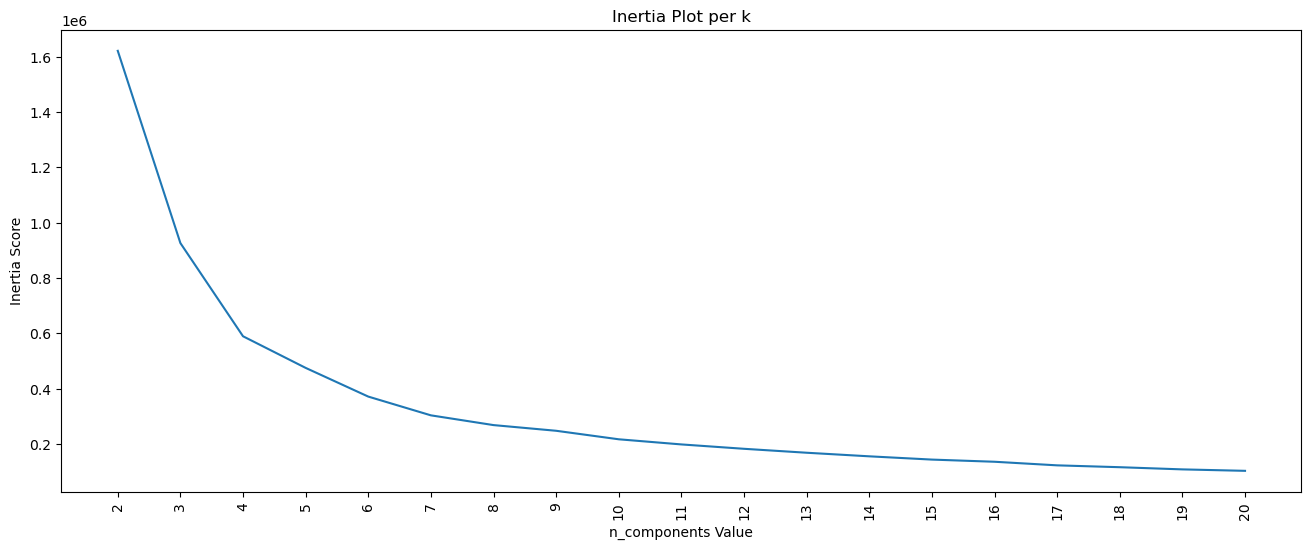

In [209]:
x_train = real[features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(x_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Anomalies: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[array([9.96907216, 7.23076923, 5.01204819, 5.78899083, 5.86486486,
       4.65413534, 9.92241379, 9.77405858, 9.73858921, 5.43478261,
       1.79591837, 5.76470588, 4.6       , 1.00000018, 1.        ,
       1.        , 1.        , 1.        , 9.8220339 , 9.9525379 ,
       1.20930233]), array([9.96907216, 7.23076923, 5.3373494 , 5.87155963, 5.86486486,
       4.72180451, 9.92241379, 9.77405858, 9.77593361, 5.56521739,
       1.79591837, 5.76470588, 4.6       , 1.00000018, 1.        ,
       1.        , 1.        , 1.        , 9.04661017, 9.9525379 ,
       1.20930233]), array([9.96907216, 7.23076923, 5.6626506 , 5.78899083, 5.86486486,
       4.72180451, 9.92241379, 9.81171548, 9.73858921, 5.56521739,
       1.79591837, 5.76470588, 4.6       , 1.00000024, 1.        ,
       1.        , 1.        , 1.        , 8.83050847, 9.95847067,
       1.20930233]), array([9.96907216, 7.23076923, 5.87951807, 5.78899083, 5.86486486,
       4.72180451, 9.92241379, 9.81171548, 9.73858921, 5.56521739

<Figure size 640x480 with 0 Axes>

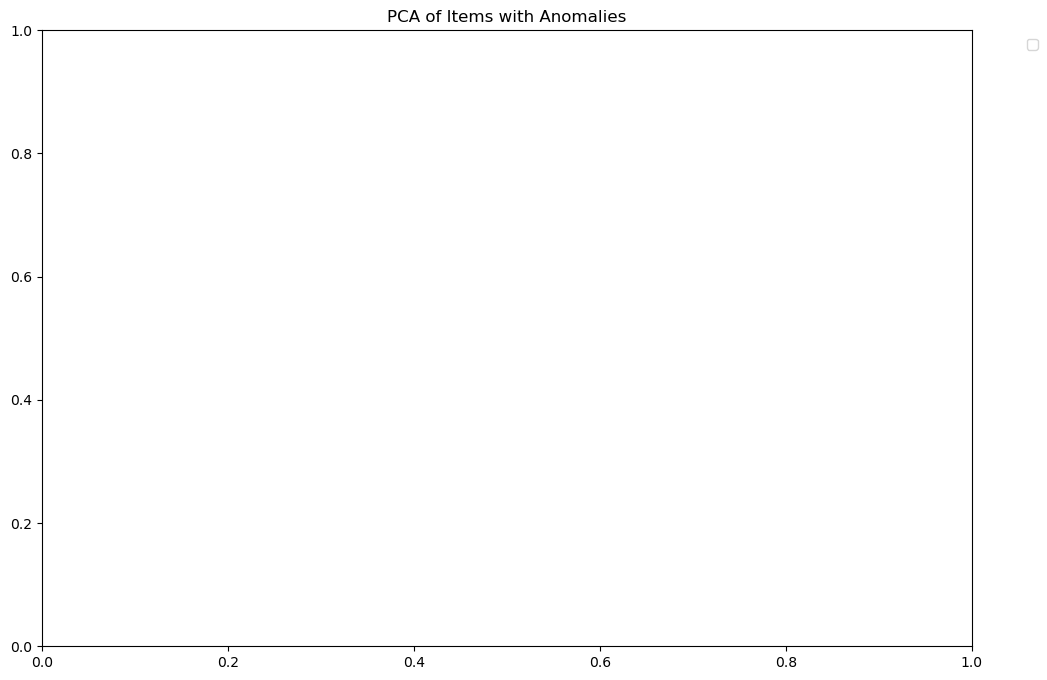

In [210]:
from sklearn.cluster import KMeans
import numpy as np

# Fit k-means to the data
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(x_train)
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate the distance of each point to its assigned cluster center
distances = [np.linalg.norm(x - cluster_centers[labels[i]]) for i, x in enumerate(x_train)]

# Set a threshold for detecting anomalies (e.g., 2 standard deviations from the mean distance)
threshold = np.mean(distances) + 2 * np.std(distances)

# Identify anomalies based on the distance threshold
anomalies = [x_train[i] for i, distance in enumerate(distances) if distance > threshold]

print("Anomalies:", anomalies)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items with Anomalies')
plt.show()


In [211]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x = x_train
ynum = predictions
target_names = ["cluster 0", "cluster 1",]
pca = PCA(n_components=2, random_state=453)
x_r = pca.fit(x).transform(x)
print("explained variance ratio (first  tewontytwo components): %s" % str(pca.explained_variance_ratio_))
plt.figure(figsize=(12, 8))  # Changed the order of figure creation and size setting
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(x_r[ynum == i, 0], x_r[ynum == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)  # Changed X_r to x_r and y_num to ynum

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of 2 Items')
plt.show()

explained variance ratio (first  tewontytwo components): [0.80669117 0.11869671]


In [212]:
from sklearn.decomposition import PCA

# Create a PCA object with all components
pca = PCA()

# Fit the PCA object to your data
pca.fit(real)

# Calculate the cumulative sum of explained variance ratios
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("The number of principal components that explain 95% of the variance is:", n_components)


The number of principal components that explain 95% of the variance is: 3


Total Variance in our dataset is:  45.92352158359088
The 95% variance we want to have is:  43.62734550441134



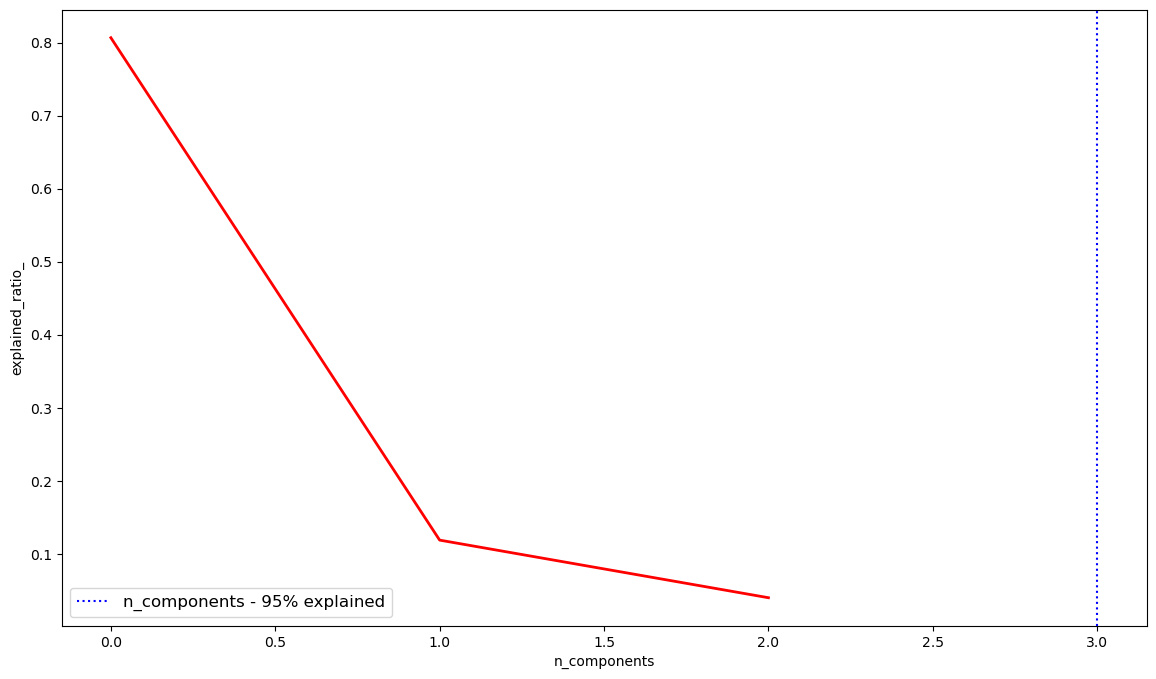

In [213]:
n_components = 3  # Choose a smaller number of components based on desired variance explained

# Running PCA with specified number of components
pca = PCA(n_components=n_components)
x_r = pca.fit(x).transform(x)

# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0, n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
plt.axvline(n_components_95, linestyle=':', label='n_components - 95% explained', c="blue")
plt.legend(prop=dict(size=12))


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 2 Clusters is: 1340189.5214257555


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 3 Clusters is: 647164.0408403047


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 4 Clusters is: 312079.1012074211


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 5 Clusters is: 198127.98037597022


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 6 Clusters is: 151292.62367552074


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 7 Clusters is: 127457.650533014


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 8 Clusters is: 106784.08985568464


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 9 Clusters is: 87600.15044258027


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 10 Clusters is: 76196.0329181551


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 11 Clusters is: 64016.94977225555


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 12 Clusters is: 53243.29381892791


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 13 Clusters is: 45740.22556577408


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 14 Clusters is: 40750.417034125465


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 15 Clusters is: 36468.819699932574


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 16 Clusters is: 31552.132584117026


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 17 Clusters is: 29820.82241578415


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 18 Clusters is: 26683.969326142476


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 19 Clusters is: 25434.826079156104


C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The innertia for : 20 Clusters is: 24782.279845776204


Text(0.5, 1.0, 'Inertia Plot per k')

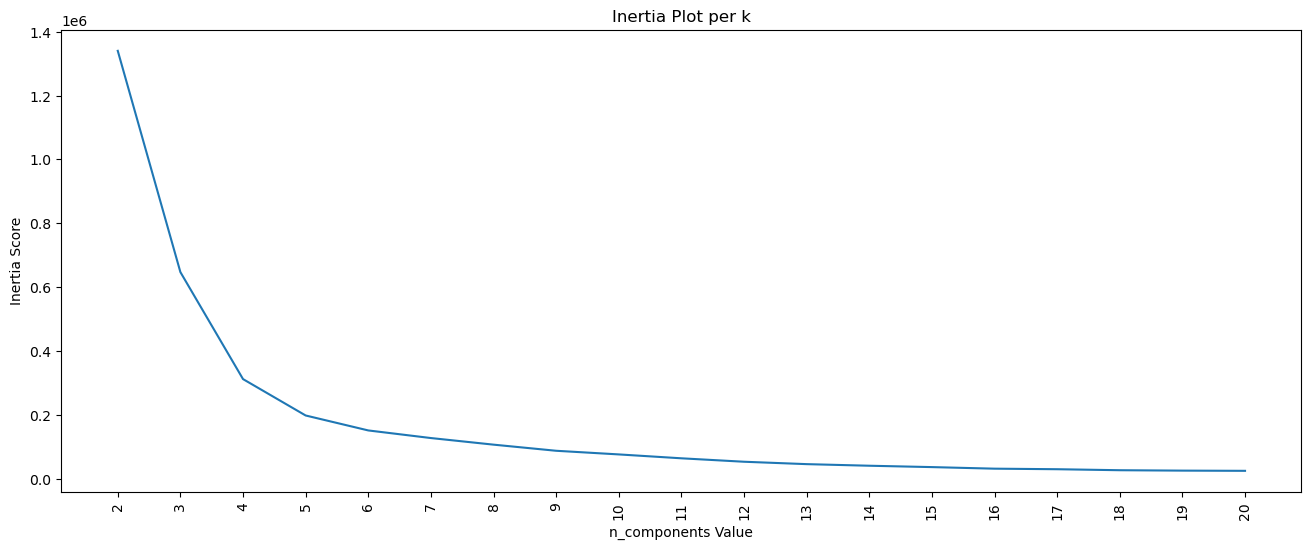

In [214]:
pca = PCA(n_components=3, random_state = 0)
x_r = pca.fit(x).transform(x)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(x_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [215]:
from sklearn.cluster import KMeans
import numpy as np

# Create an instance of KMeans with 2 clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(real)

# Get the centroids of the clusters
centroids_pca = kmeans.cluster_centers_

# Print the centroids
print("Centroids of the clusters in the reduced space:")
print(centroids_pca)

C:\Users\ehite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroids of the clusters in the reduced space:
[[9.49478783 1.00065378 3.7918396  1.00061103 1.00053459 1.00053563
  1.00153132 1.00136297 1.0013523  1.00100109 1.00101338 1.00038178
  1.0005151  1.00035389 9.84767561 9.69934148 9.67337037 9.67235726
  1.00068578 1.00122952 2.44366963]
 [9.97209981 7.21977246 6.97942068 5.32678426 5.22049494 5.08715753
  9.85453157 9.79853844 9.68216617 5.35724919 1.7019025  4.9656361
  4.9897635  1.00018315 1.02251461 1.02809276 1.02816099 1.03081495
  6.78369489 9.94544009 5.818406  ]
 [9.49709854 1.00295504 3.88298952 1.0006712  1.00093906 1.00090331
  1.00241837 1.00239566 1.00235243 1.00233337 1.00153303 1.00179915
  1.00203904 1.0010135  9.8515676  9.67065311 9.66278969 9.64163917
  1.00248521 1.00219087 8.12132868]
 [1.41760404 1.02102453 1.03575255 1.         1.01846749 1.00151681
  1.0011781  1.03428058 1.02238504 5.84655286 8.43592014 1.0857471
  1.         9.94473024 6.96312791 8.32252021 8.30119441 8.22907085
  1.         1.         1.0287

In [216]:
from sklearn.decomposition import PCA
import numpy as np



pca = PCA(n_components=3)  # Specify the number of components you want
pca.fit(real)

# Get the PCA transformation matrix
pca_transformation = pca.components_.T

# Calculate the inverse of the PCA transformation matrix
pca_transformation_inv = np.linalg.pinv(pca_transformation)


In [217]:
pca_transformation_inv

array([[ 1.45193106e-02,  2.18390899e-01,  1.13044275e-01,
         1.54052308e-01,  1.50596739e-01,  1.46594210e-01,
         3.10995667e-01,  3.09183969e-01,  3.04943080e-01,
         1.56844945e-01,  2.43156593e-02,  1.41871886e-01,
         1.43239679e-01,  2.25095631e-03, -3.12611632e-01,
        -3.07298482e-01, -3.06630947e-01, -3.06228465e-01,
         2.01956062e-01,  3.14116302e-01,  2.92734446e-02],
       [-7.43986767e-02,  4.57655991e-03, -5.40769268e-02,
        -9.01075981e-03, -1.05634138e-02, -1.46476027e-02,
         6.73662220e-03,  5.93977953e-03,  6.61352794e-03,
         3.17650183e-02,  6.64305062e-02, -1.04498603e-02,
        -1.52328162e-02,  8.13170104e-02, -3.36833493e-02,
        -1.51427483e-02, -1.76415261e-02, -1.56074480e-02,
         1.90361891e-02,  6.25098821e-03, -9.88074888e-01],
       [-5.07933364e-01, -3.66376573e-02, -2.28212710e-01,
        -8.62928489e-03, -5.59194774e-03, -2.78075346e-04,
        -5.68112028e-02, -5.27130412e-02, -5.38227906e

In [218]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming you have already performed PCA on your data
# with n_components = k

# Let's say 'centroids' is your matrix of transformed centroids
centroids = np.random.random((5, 3))

# Assuming 'pca' is your PCA object
inverse_transformed_centroids = pca.inverse_transform(centroids)

# The 'inverse_transformed_centroids' will now contain the transformed centroids
# in the original space


In [219]:
inverse_transformed_centroids

array([[9.04272657, 1.45588357, 3.83789342, 1.31814951, 1.31096552,
        1.3008448 , 1.64592588, 1.64392454, 1.63468311, 1.61776459,
        1.51414935, 1.29678235, 1.29454966, 1.54365884, 9.03628193,
        8.9812653 , 8.96194079, 8.95053112, 1.42814515, 1.65269529,
        4.29577973],
       [8.99579172, 1.35800027, 3.78330259, 1.25789962, 1.25338623,
        1.24778292, 1.50571182, 1.50548826, 1.4974841 , 1.58396356,
        1.54513879, 1.24373755, 1.2435193 , 1.58841122, 9.16407513,
        9.11234662, 9.09408588, 9.08072469, 1.32813263, 1.51159861,
        4.80149985],
       [9.02398617, 1.36718243, 3.7866093 , 1.25598613, 1.25026419,
        1.24187719, 1.51949668, 1.51832479, 1.51076174, 1.56238957,
        1.51661826, 1.23975112, 1.23698731, 1.55700669, 9.15897155,
        9.10426472, 9.08468034, 9.07298867, 1.34581427, 1.52503645,
        4.28548001],
       [9.3221411 , 1.38714212, 3.9435868 , 1.27372801, 1.26796435,
        1.26085102, 1.54980044, 1.54746424, 1.5396218

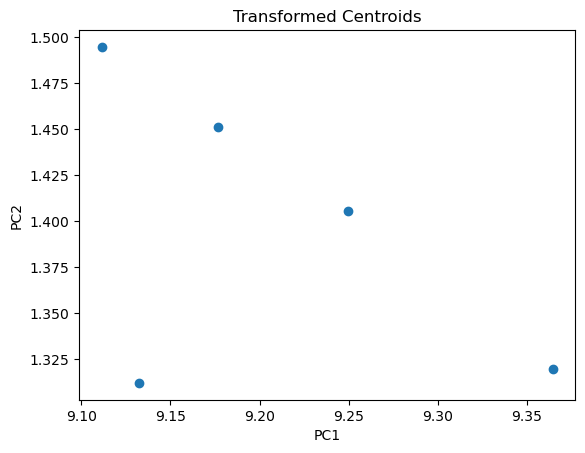

In [220]:
import matplotlib.pyplot as plt

# Assuming 'centroids' is your matrix of transformed centroids
centroids = np.random.random((5, 3))

# Assuming 'pca' is your PCA object
inverse_transformed_centroids = pca.inverse_transform(centroids)

# Visualize the transformed centroids
plt.scatter(inverse_transformed_centroids[:, 0], inverse_transformed_centroids[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Transformed Centroids')
plt.show()


In [221]:
s_train = real

In [222]:
s_train

batv_right  engnst_right  engntemp_right  genal1_right  \
Timestamp                                                                 
 1675066942538     9.474227           1.0        3.602410           1.0   
 1675067002519     9.474227           1.0        3.602410           1.0   
 1675067122792     9.474227           1.0        3.602410           1.0   
 1675067184974     9.474227           1.0        3.602410           1.0   
 1675067244134     9.474227           1.0        3.602410           1.0   
...                     ...           ...             ...           ...   
 1692192391690     9.505155           1.0        5.554217           1.0   
 1692192451653     9.505155           1.0        5.554217           1.0   
 1692192511737     9.505155           1.0        5.554217           1.0   
 1692192571705     9.505155           1.0        5.554217           1.0   
 1692192711657     9.505155           1.0        5.554217           1.0   

                 genal2_right  genal3_right  genvl1_right  genvl2_right  \
Timestamp                                                                 
 1675066942538            1.0           1.0           1.0           1.0   
 1675067002519            1.0           1.0           1.0           1.0   
 1675067122792            1.0           1.0           1.0           1.0   
 1675067184974            1.0           1.0           1.0           1.0   
 1675067244134            1.0           1.0           1.0           1.0   
...                       ...           ...           ...           ...   
 1692192391690            1.0           1.0           1.0           1.0   
 1692192451653            1.0           1.0           1.0           1.0   
 1692192511737            1.0           1.0           1.0           1.0   
 1692192571705            1.0           1.0           1.0           1.0   
 1692192711657            1.0           1.0           1.0           1.0   

                 genvl3_right  gkva_right  ...  gkval2_right  gkval3_right  \
Timestamp                                  ...                               
 1675066942538            1.0         1.0  ...           1.0           1.0   
 1675067002519            1.0         1.0  ...           1.0           1.0   
 1675067122792            1.0         1.0  ...           1.0           1.0   
 1675067184974            1.0         1.0  ...           1.0           1.0   
 1675067244134            1.0         1.0  ...           1.0           1.0   
...                       ...         ...  ...           ...           ...   
 1692192391690            1.0         1.0  ...           1.0           1.0   
 1692192451653            1.0         1.0  ...           1.0           1.0   
 1692192511737            1.0         1.0  ...           1.0           1.0   
 1692192571705            1.0         1.0  ...           1.0           1.0   
 1692192711657            1.0         1.0  ...           1.0           1.0   

                 kwh_right  mainsf_right  mainvl1_right  mainvl2_right  \
Timestamp                                                                
 1675066942538    1.000000      9.823183       9.516529       9.477178   
 1675067002519    1.000000      9.840864       9.516529       9.514523   
 1675067122792    1.000000      9.840864       9.516529       9.477178   
 1675067184974    1.000000      9.823183       9.516529       9.477178   
 1675067244134    1.000000      9.840864       9.516529       9.477178   
...                    ...           ...            ...            ...   
 1692192391690    1.000384      9.858546       9.702479       9.701245   
 1692192451653    1.000384      9.823183       9.739669       9.663900   
 1692192511737    1.000384      9.805501       9.702479       9.663900   
 1692192571705    1.000384      9.876228       9.702479       9.663900   
 1692192711657    1.000384      9.823183       9.702479       9.701245   

                 mainvl3_right  oilpres_right  rpm_right  runhour_right  
Timestamp    

In [223]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [224]:
pip install adtk


Note: you may need to restart the kernel to use updated packages.


In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD, QuantileAD, InterQuartileRangeAD, GeneralizedESDTestAD, PersistAD, VolatilityShiftAD, CustomizedDetectorHD


In [226]:
real.reset_index(inplace=True)


In [227]:
real

Timestamp  batv_right  engnst_right  engntemp_right  \
0        1675066942538     9.474227           1.0        3.602410   
1        1675067002519     9.474227           1.0        3.602410   
2        1675067122792     9.474227           1.0        3.602410   
3        1675067184974     9.474227           1.0        3.602410   
4        1675067244134     9.474227           1.0        3.602410   
...                 ...         ...           ...             ...   
169594   1692192391690     9.505155           1.0        5.554217   
169595   1692192451653     9.505155           1.0        5.554217   
169596   1692192511737     9.505155           1.0        5.554217   
169597   1692192571705     9.505155           1.0        5.554217   
169598   1692192711657     9.505155           1.0        5.554217   

        genal1_right  genal2_right  genal3_right  genvl1_right  genvl2_right  \
0                1.0           1.0           1.0           1.0           1.0   
1                1.0           1.0           1.0           1.0           1.0   
2                1.0           1.0           1.0           1.0           1.0   
3                1.0           1.0           1.0           1.0           1.0   
4                1.0           1.0           1.0           1.0           1.0   
...              ...           ...           ...           ...           ...   
169594           1.0           1.0           1.0           1.0           1.0   
169595           1.0           1.0           1.0           1.0           1.0   
169596           1.0           1.0           1.0           1.0           1.0   
169597           1.0           1.0           1.0           1.0           1.0   
169598           1.0           1.0           1.0           1.0           1.0   

        genvl3_right  ...  gkval2_right  gkval3_right  kwh_right  \
0                1.0  ...           1.0           1.0   1.000000   
1                1.0  ...           1.0           1.0   1.000000   
2                1.0  ...           1.0           1.0   1.000000   
3                1.0  ...           1.0           1.0   1.000000   
4                1.0  ...           1.0           1.0   1.000000   
...              ...  ...           ...           ...        ...   
169594           1.0  ...           1.0           1.0   1.000384   
169595           1.0  ...           1.0           1.0   1.000384   
169596           1.0  ...           1.0           1.0   1.000384   
169597           1.0  ...           1.0           1.0   1.000384   
169598           1.0  ...           1.0           1.0   1.000384   

        mainsf_right  mainvl1_right  mainvl2_right  mainvl3_right  \
0           9.823183       9.516529       9.477178       9.477178   
1           9.840864       9.516529       9.514523       9.477178   
2           9.840864       9.516529       9.477178       9.477178   
3           9.823183       9.516529       9.477178       9.477178   
4           9.840864       9.516529       9.477178       9.477178   
...              ...            ...            ...            ...   
169594      9.858546       9.702479       9.701245       9.701245   
169595      9.823183       9.739669       9.663900       9.701245   
169596      9.805501       9.702479       9.663900       9.701245   
169597      9.876228       9.702479       9.663900       9.701245   
169598      9.823183       9.702479       9.701245       9.701245   

        oilpres_right  rpm_right  runhour_right  
0                 1.0        1.0       1.209302  
1                 1.0        1.0       1.209302  
2                 1.0        1.0       1.209302  
3                 1.0        1.0       1.209302  
4                 1.0        1.0       1.209302  
...               ...        ...            ...  
169594            1.0        1.0      10.000000  
169595            1.0        1.0      10.000000  
169596            1.0        1.0      10.000000  
169597            1.0        1.0      10.000000  
169598            1.0       

In [228]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169599 entries, 0 to 169598
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Timestamp       169599 non-null  object 
 1   batv_right      169599 non-null  float64
 2   engnst_right    169599 non-null  float64
 3   engntemp_right  169599 non-null  float64
 4   genal1_right    169599 non-null  float64
 5   genal2_right    169599 non-null  float64
 6   genal3_right    169599 non-null  float64
 7   genvl1_right    169599 non-null  float64
 8   genvl2_right    169599 non-null  float64
 9   genvl3_right    169599 non-null  float64
 10  gkva_right      169599 non-null  float64
 11  gkval1_right    169599 non-null  float64
 12  gkval2_right    169599 non-null  float64
 13  gkval3_right    169599 non-null  float64
 14  kwh_right       169599 non-null  float64
 15  mainsf_right    169599 non-null  float64
 16  mainvl1_right   169599 non-null  float64
 17  mainvl2_ri

In [229]:
real["Timestamp"] = pd.to_datetime(real["Timestamp"], unit='ms')



C:\Users\ehite\AppData\Local\Temp\ipykernel_16224\924122495.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  real["Timestamp"] = pd.to_datetime(real["Timestamp"], unit='ms')


In [230]:
real.reset_index(inplace=True)

In [231]:
real.columns

Index(['index', 'Timestamp', 'batv_right', 'engnst_right', 'engntemp_right',
       'genal1_right', 'genal2_right', 'genal3_right', 'genvl1_right',
       'genvl2_right', 'genvl3_right', 'gkva_right', 'gkval1_right',
       'gkval2_right', 'gkval3_right', 'kwh_right', 'mainsf_right',
       'mainvl1_right', 'mainvl2_right', 'mainvl3_right', 'oilpres_right',
       'rpm_right', 'runhour_right'],
      dtype='object')

In [232]:
real.drop('index', axis=1, inplace=True)

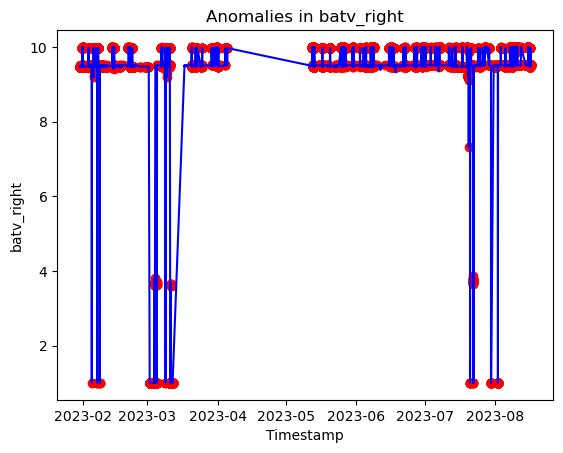

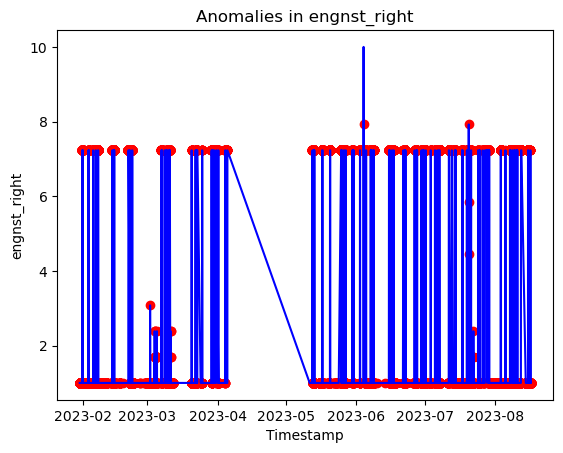

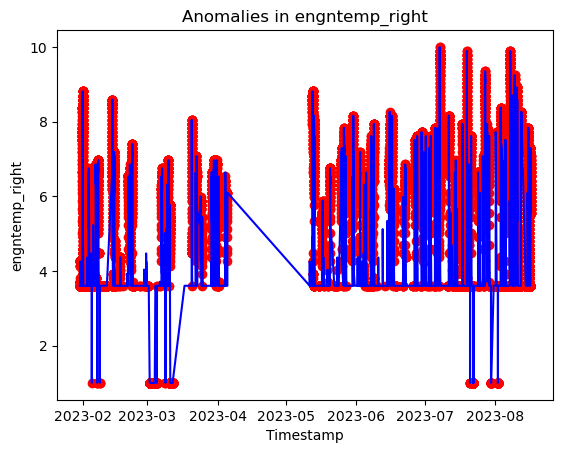

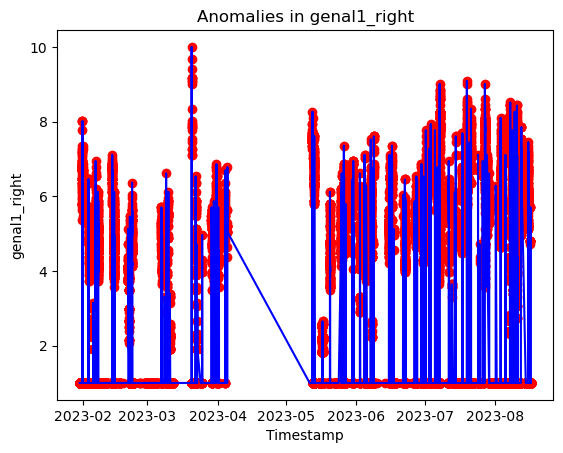

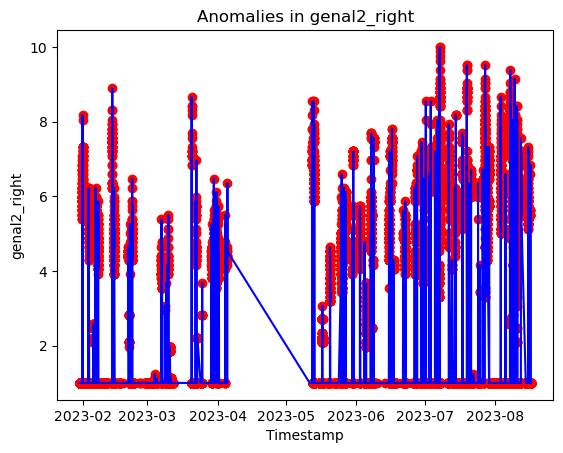

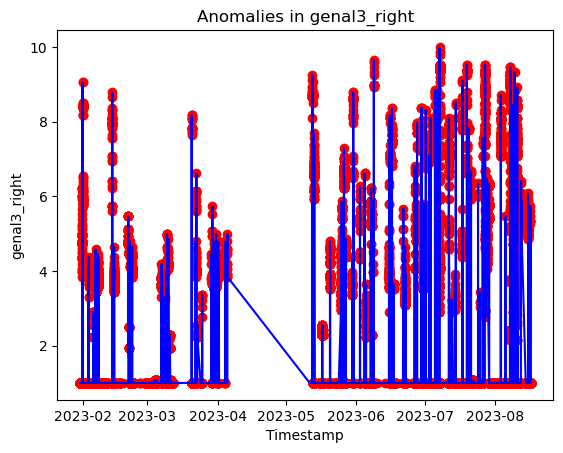

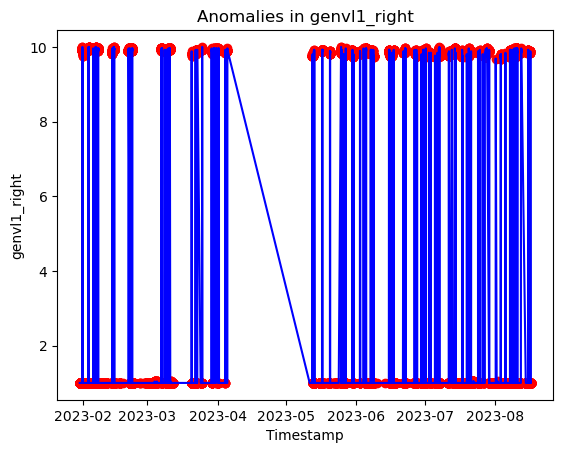

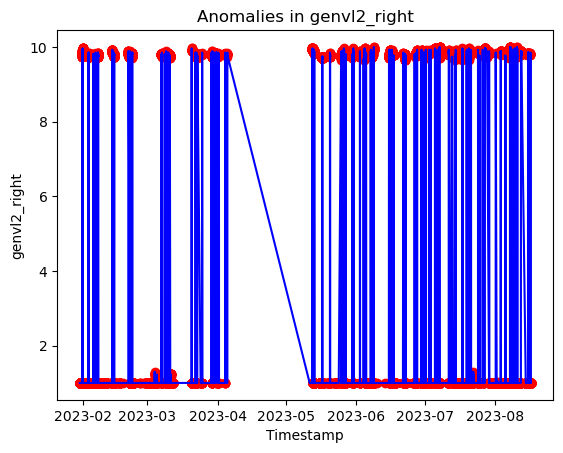

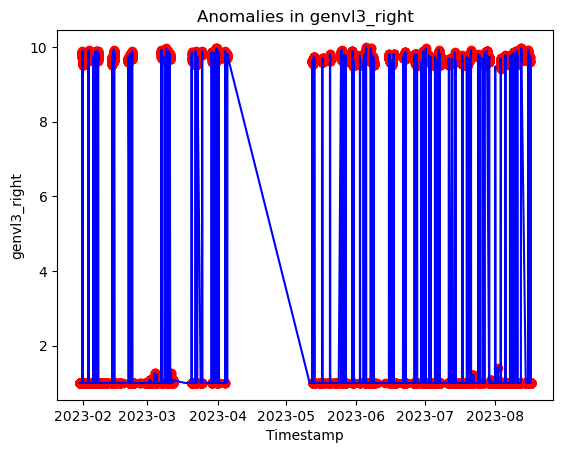

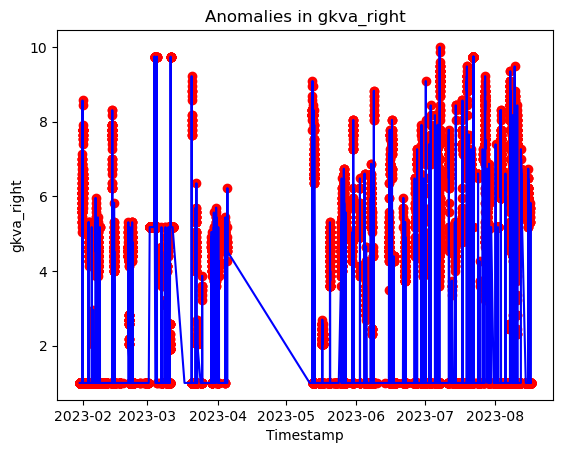

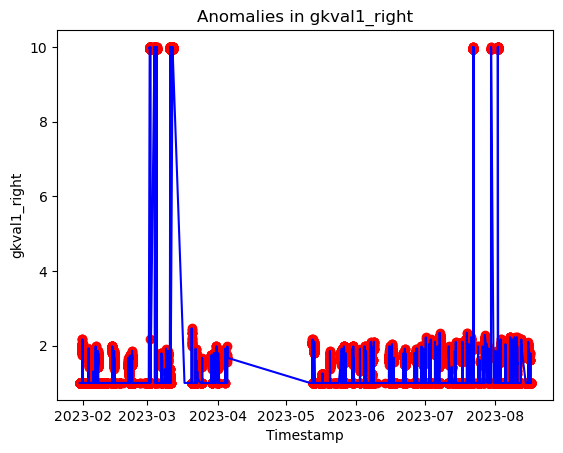

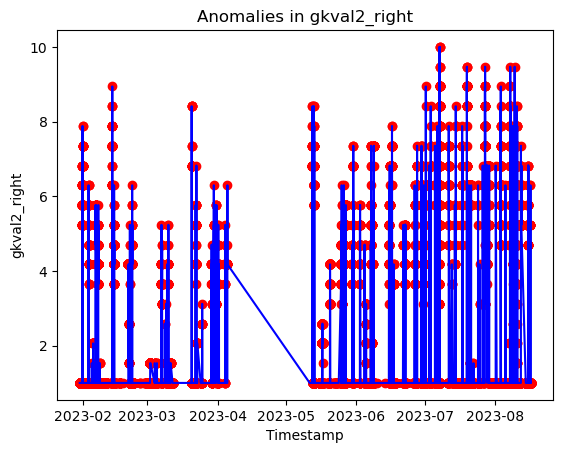

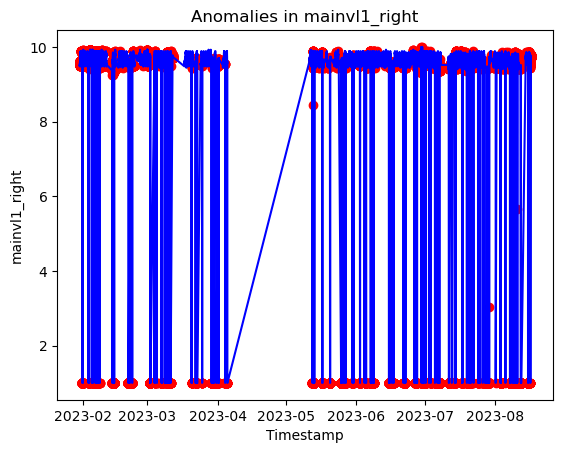

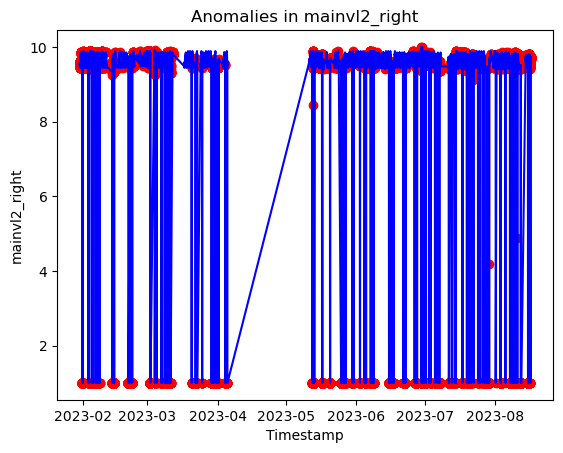

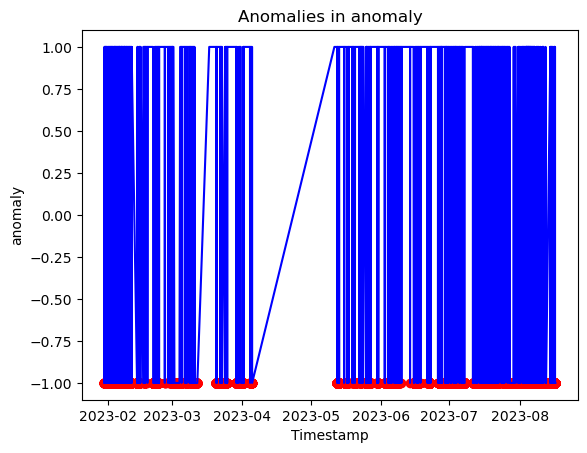

In [233]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

# Assuming real is the dataframe with the data
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), max_features=1.0)
model.fit(real.drop(['Timestamp'], axis=1))

# Predict the anomalies
real['anomaly'] = pd.Series(model.predict(real.drop(['Timestamp'], axis=1)))

# Visualize the anomalies
for column in real.columns:
    if column != 'Timestamp':
        plt.plot(real['Timestamp'], real[column], color='blue')
        plt.scatter(real[real['anomaly'] == -1]['Timestamp'], real[real['anomaly'] == -1][column], color='red')
        plt.title(f'Anomalies in {column}')
        plt.xlabel('Timestamp')
        plt.ylabel(column)
        plt.show()
